In [12]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpmath import mp

plt.rcParams['legend.frameon']  = False
plt.rcParams['legend.fontsize'] = 'xx-large'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['figure.figsize']  = (10, 7)

# 1. Data collection and preprocessing

Using pandas to read the data and have a first look on the features.

## 1.1 First look at the data

We read the data from the csv file (without headers) and print the fisrt $5$ rows. We see that we have multivariate data with $569$ objects and $32$ variables. With a first look at the values of column $1$, We can guess that it contains the labels of the data. 

In [13]:
# There is no attribute information so we proceed to read the data withouth headers
df = pd.read_csv("wdbc.data", header=None)


# Printing the dimension of the first rows
print(f"The dimension of the data is {df.values.shape}. \n")
print(df.head())
#print(df[0].values)

The dimension of the data is (569, 32). 

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.

## 1.2 Missing values

We poceed to see if any data was missing and to figure out what kind of data we are working with. Looking at the code below, we conclude that the numbers in columns $2$ to $31$ are continuous variables. Column $0$ has discrete variables, and column $1$ contains categorical variables with "$M$" or "$B$" values. We also can see that there is no missing data in our set.

In [14]:
# Exploring the type of data
print(df.dtypes,"\n")

# Checking posibly missing values for each column.
print(f"There are {df.isnull().sum().sum()} missing values in the data.\n")
print("column  zeros\n", df.isnull().sum())

0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object 

There are 0 missing values in the data.

column  zeros
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64


We also check for $0$ values and conclude that they are part of the data and not be interpreted as missing values.

In [15]:
number_B = (df[1]=="B").sum()
print(f"Numbers of B in the dataframe: {number_B}")

Numbers of B in the dataframe: 357


In [16]:
# printing the sum of 0 appearing in each column and in total
print(f"In the data there are {(df==0).sum().sum()} zeros in total.\n")
print("column  zeros\n",(df==0).sum())

In the data there are 78 zeros in total.

column  zeros
 0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     13
9     13
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18    13
19    13
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28    13
29    13
30     0
31     0
dtype: int64


## 1.3 Raw data Visualization

We investigate patterns and general properties of the data using histograms and plots. First we get a description of the data to check measures of central tendency and dispersion. We can observe again that there are no missing values, also that the data have a wide range of values that may affect further analysis, indicating the necessity of data normalization. We also can observe that the largest values are situated in the $0$ column.

In [17]:
# General description of data (measures of central tendency and dispersion)
df.describe()

0           2           3           4            5   \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               6           7           8           9           10  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000    0.106000  ...   
25%      0.086370    0.064920    0.029560    0.020310    0.161900  ...   
50%      0.095870    0.092630    0.061540    0.033500    0.179200  ...   
75%      0.105300    0.130400    0.130700    0.074000    0.195700  ...   
max      0.163400    0.345400    0.426800    0.201200    0.304000  ...   

               22          23          24           25          26  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               27          28          29          30          31  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 31 columns]

### 1.3.1 Histograms

We are making the histograms for each attribute to visualize measures of central tendency and dispersion.

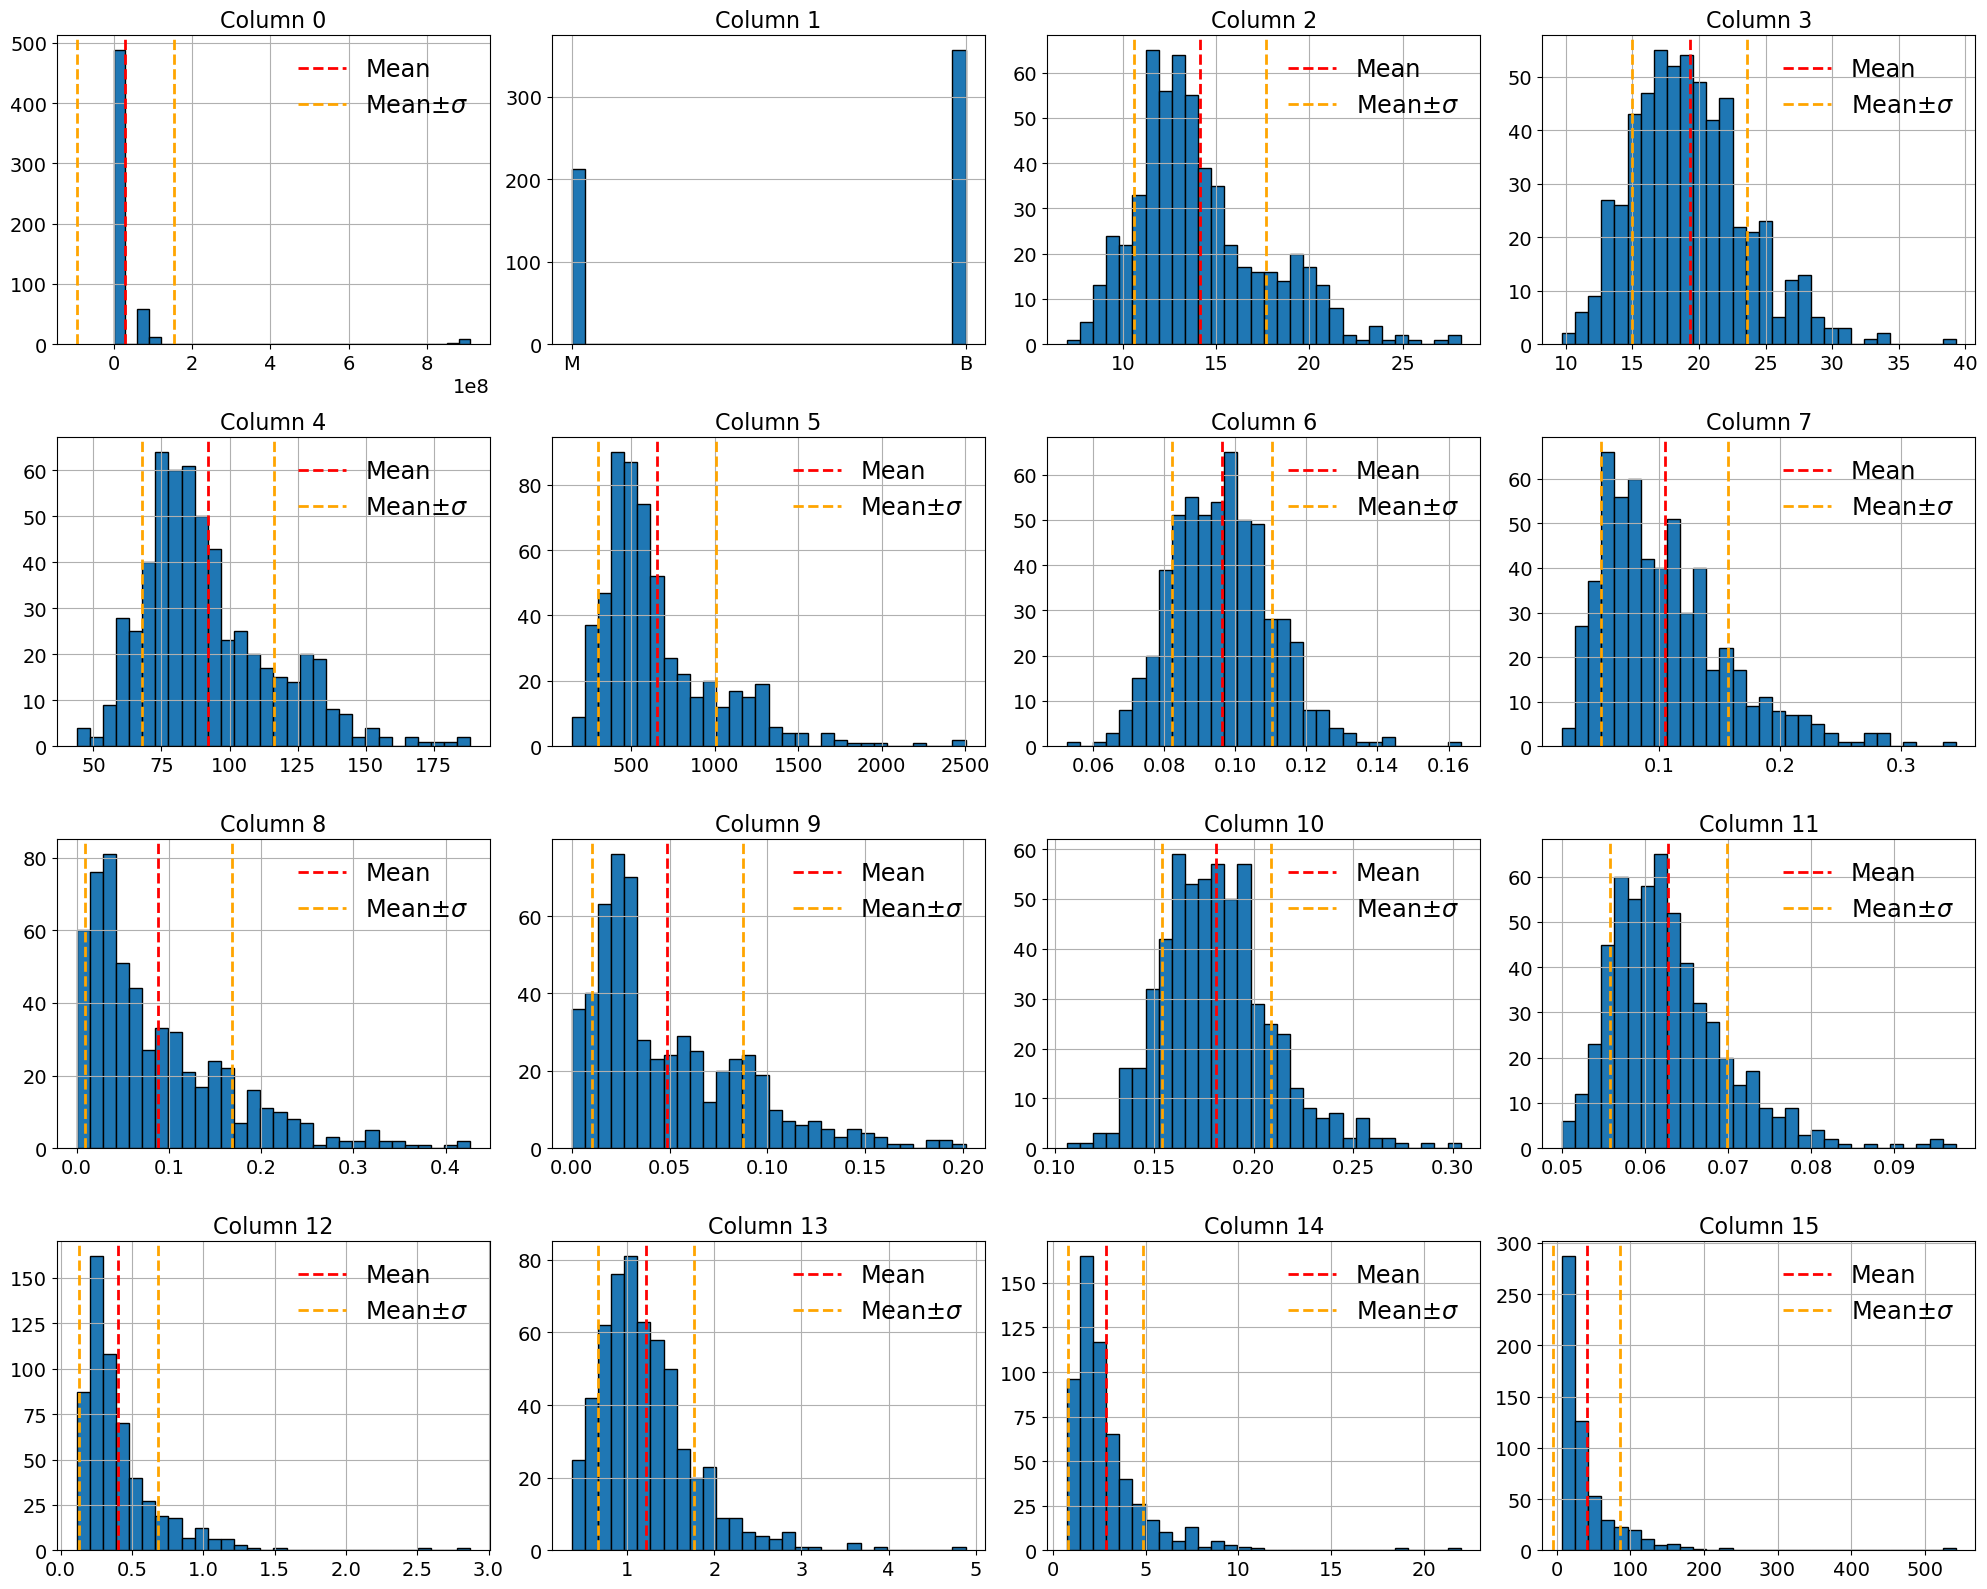

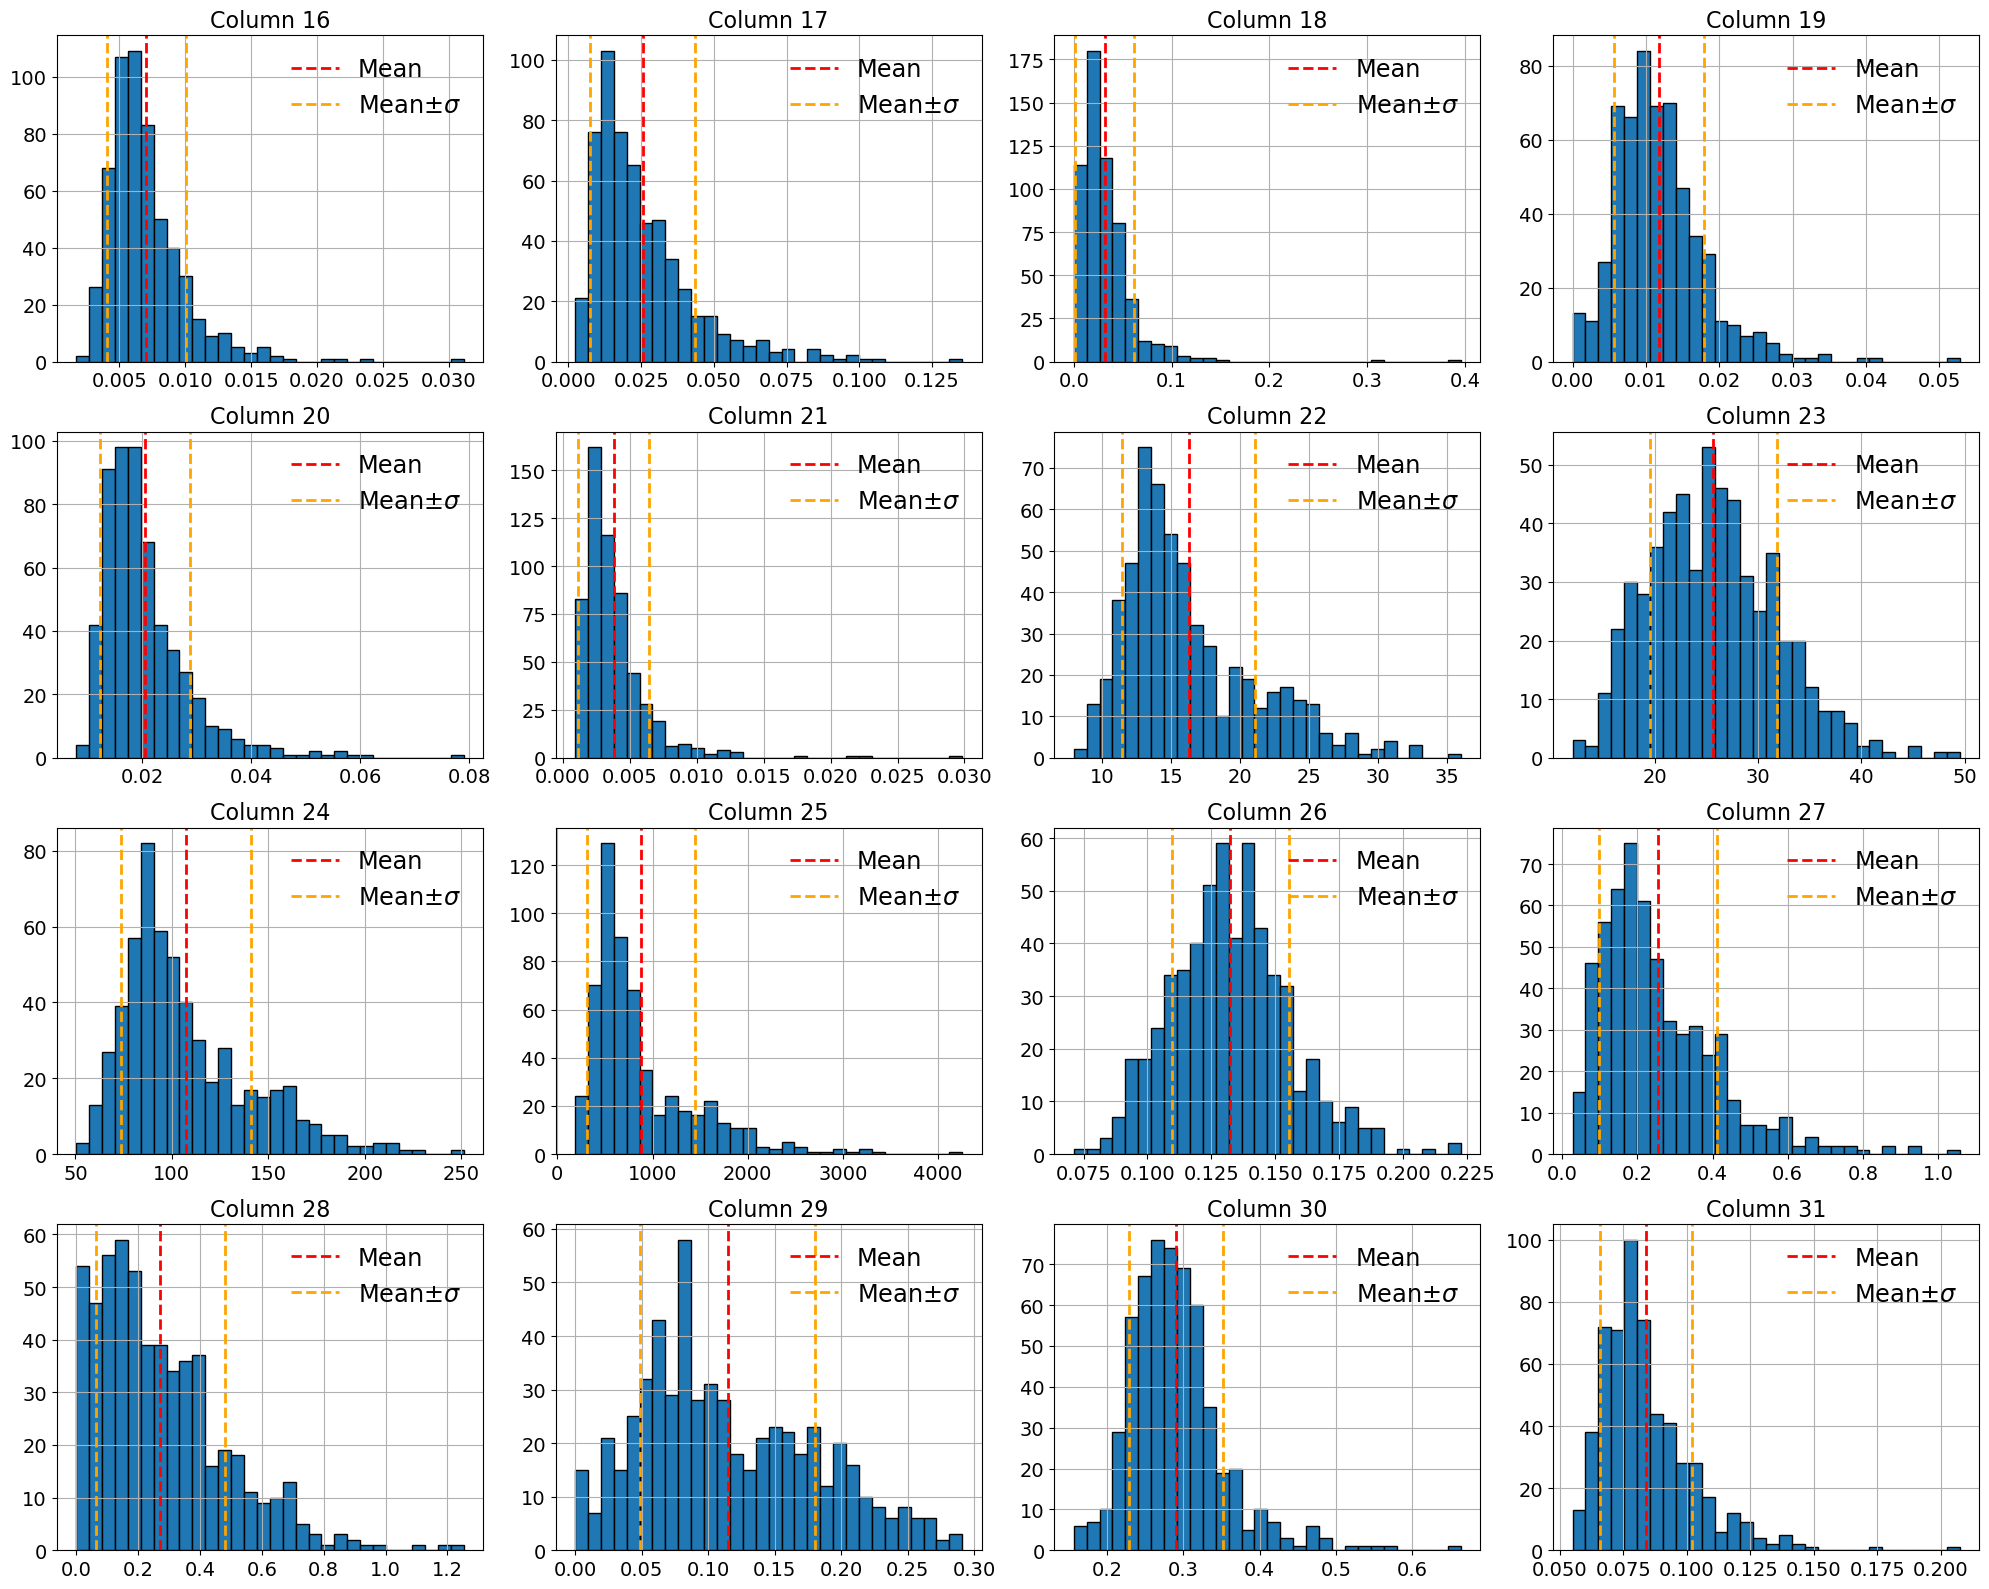

In [18]:
# b) Making histograms for each features and putting them in the 2 plots
for j in range(2):  # 2 cycles to have 2 plots, 32 histograms in total.
    fig, axes = plt.subplots(4, 4, figsize=(20, 16))  
    axes = axes.flatten()              # 2D array of subplots into a 1D array
    for i, ax in enumerate(axes):      # !Enumerate create pairs like : (0, axe1), (1,axe2)....,(n,axen) 
            ax.hist(df[i + j*16], bins=30, edgecolor='black')
            ax.set_title("Column {}".format(df.columns[i]+ j*16 ))
            ax.grid()
            
            if i + j*16 !=1:
            # Adding mean and standard deviation in vertical lines
                mean_val = np.mean(df[i + j*16])  
                std_val = np.std(df[i + j*16])    
                ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
                ax.axvline(mean_val + std_val, color='orange', linestyle='dashed', linewidth=2, label='Mean$\pm \sigma$')
                ax.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2)
                ax.legend()
    plt.tight_layout()    # Adjusting plots
    
    #fig.suptitle("Histograms", fontsize=20)    #title of the subplot

Plotting the scatter plot of column $0$ with the other ones.

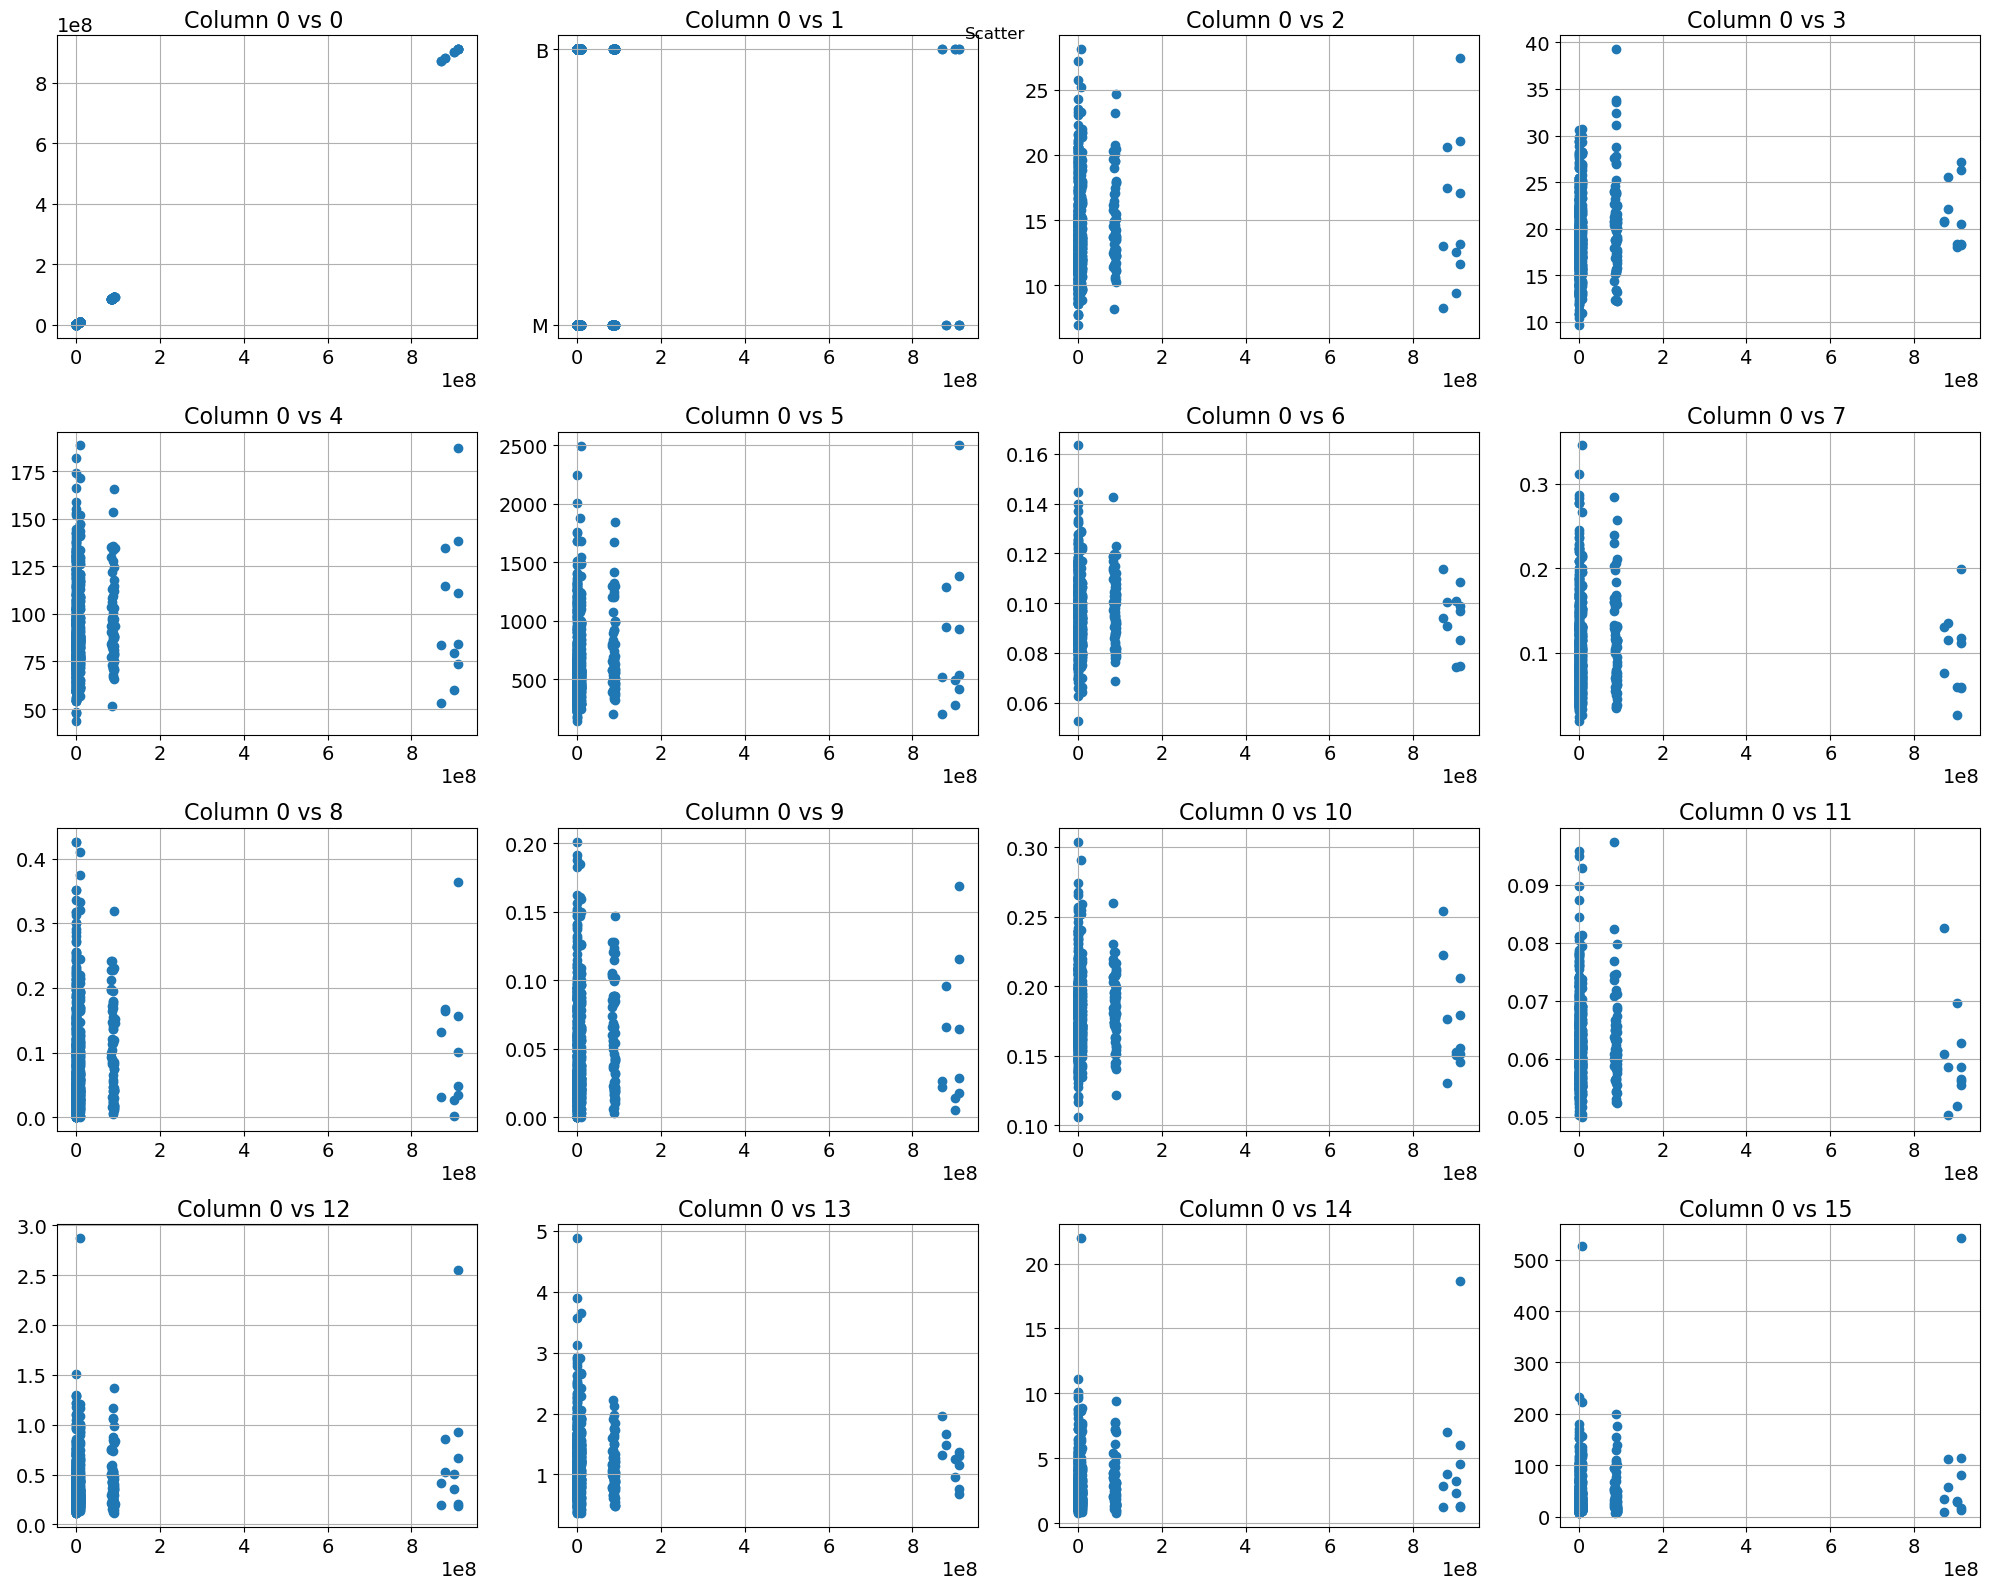

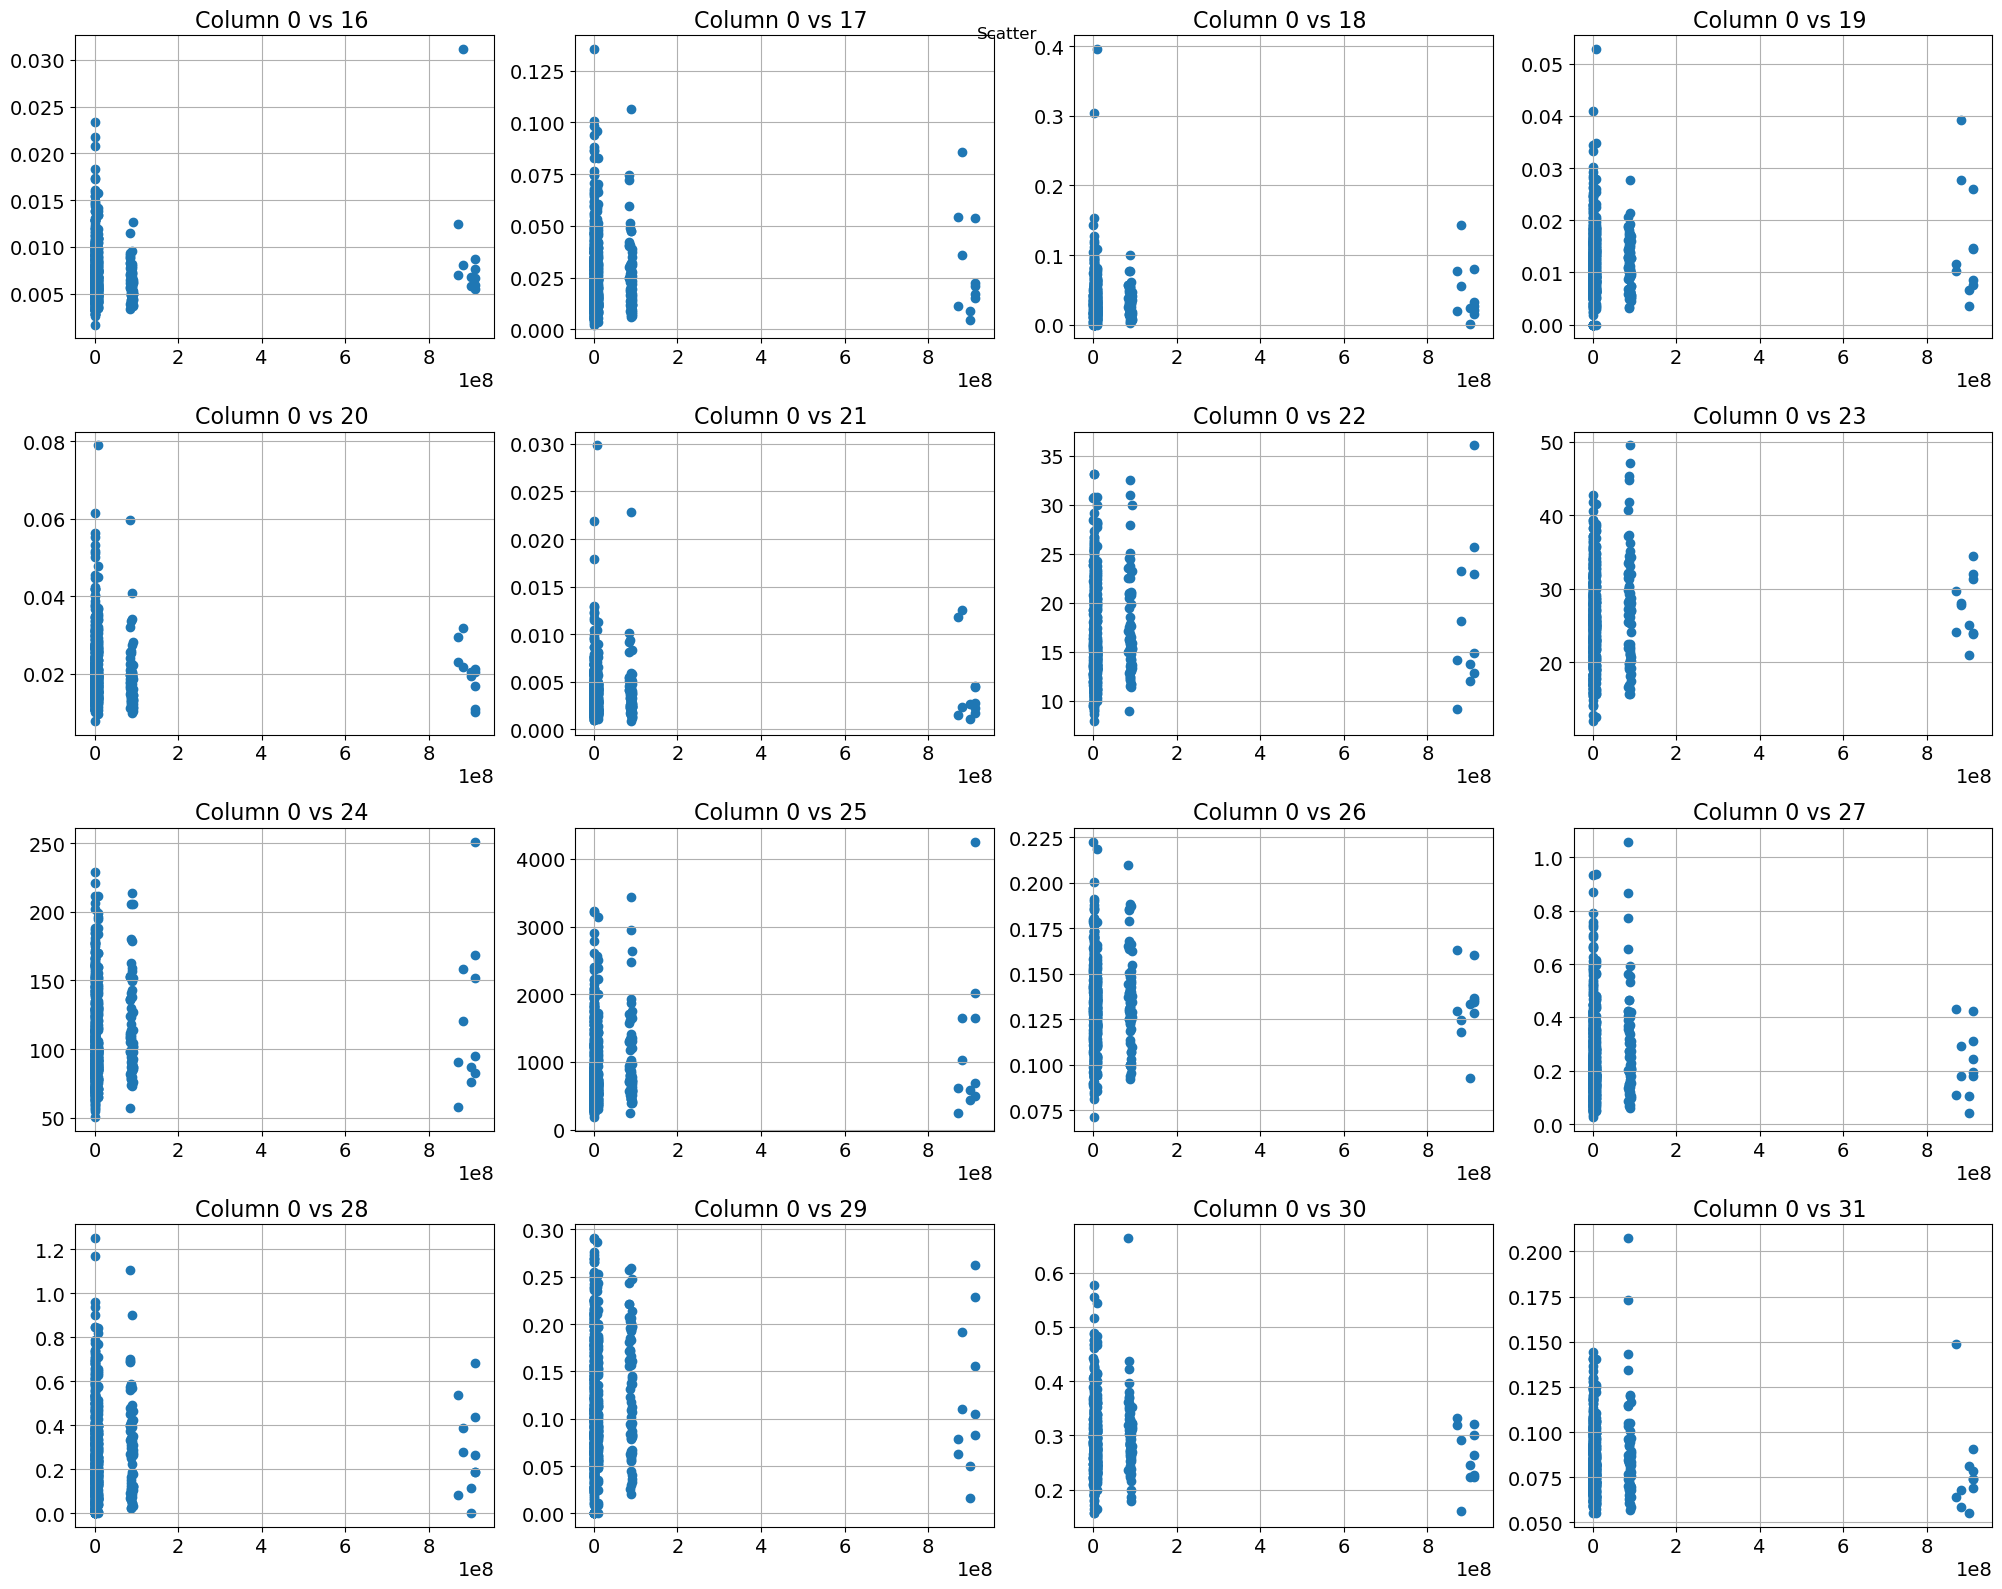

In [19]:
#Scatter plot of the 0 column

for j in range(2):  # 2 cycles to have 2 plots, 32 scatter plots in total.
    fig, axes = plt.subplots(4, 4, figsize=(20, 16))  
    axes = axes.flatten()              
    for i, ax in enumerate(axes):      
            ax.scatter(df[0], df[i + j*16])
            ax.set_title("Column 0 vs {} ".format(df.columns[i]+ j*16 ))
            ax.grid()
    plt.tight_layout()    # Adjusting plots
    
    fig.suptitle("Scatter")    #title of the subplot

# 2. Transforming the data

We can observe from the histograms that we have symmetric and Skewed right distributions. We can conclude again that column $1$ represent the labels of the data. Furthermore, based on the information above, we are going to assume that there is no relation between the variables of column $0$ to the other ones, and we will discard it.


In [20]:
# Transforming the data while conserving the original 
df2 = df.copy()       # making a copy of the original data frame to keep original data for further comparisson.

# Replacing the labels M for 1 and B for 0.
labels = (df[1]=="M")      
labels = labels.astype(int)    
df2[1] = labels     # Labels in the data
print(f"The transformed abels are: \n{labels}")

#Droping the 0 column and the labels in the new data frame
df2= df2.drop(0, axis = 1)
df2= df2.drop(1, axis = 1)
df2.head()

The transformed abels are: 
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 569, dtype: int32


2      3       4       5        6        7       8        9       10  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        11  ...     22     23      24      25      26      27      28      29  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 30 columns]

## 2.1 Normalizing

We will proceed to normalize the data using $3$ types of normalization and compare them. Despite the fact that in the histograms there are some cases where some values are away from the mode and/or mean, we will interprete them not as an outliers, but still proceed cautious and use MinMaxScaler and StandardScaler. Since there are a lot of skewed histograms and in general no negative values in the data, we will also use logaritmic normalization.

### 2.1.1 MinMax scale

In [21]:
from sklearn.preprocessing import MinMaxScaler

Transforming the data using MinMaxScaler, calculating covariance and correlation matrix. With this normalization we should get the transformed data to be in the range $[0,1]$. 

In [22]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
transformed_df_minmax = scaler.fit_transform(df2)

#Transforming the data from numpy to dataframe
transformed_df_minmax = pd.DataFrame(transformed_df_minmax)

# describing the normalized data
print("MinMax Normalized data: \n",transformed_df_minmax.head())
transformed_df_minmax.describe()

MinMax Normalized data: 
          0         1         2         3         4         5         6   \
0  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   

         7         8         9   ...        20        21        22        23  \
0  0.731113  0.686364  0.605518  ...  0.620776  0.141525  0.668310  0.450698   
1  0.348757  0.379798  0.141323  ...  0.606901  0.303571  0.539818  0.435214   
2  0.635686  0.509596  0.211247  ...  0.556386  0.360075  0.508442  0.374508   
3  0.522863  0.776263  1.000000  ...  0.248310  0.385928  0.241347  0.094008   
4  0.518390  0.378283  0.186816  ...  0.519744  0.123934  0.506948  0.341575   

         24        25        26        27 

0           1           2           3           4           5   \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.338222    0.323965    0.332935    0.216920    0.394785    0.260601   
std      0.166787    0.145453    0.167915    0.149274    0.126967    0.161992   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.223342    0.218465    0.216847    0.117413    0.304595    0.139685   
50%      0.302381    0.308759    0.293345    0.172895    0.390358    0.224679   
75%      0.416442    0.408860    0.416765    0.271135    0.475490    0.340531   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          20  \
count  569.000000  569.000000  569.000000  569.000000  ...  569.000000   
mean     0.208058    0.243137    0.379605    0.270379  ...    0.296663   
std      0.186785    0.192857    0.138456    0.148702  ...    0.171940   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.069260    0.100944    0.282323    0.163016  ...    0.180719   
50%      0.144189    0.166501    0.369697    0.243892  ...    0.250445   
75%      0.306232    0.367793    0.453030    0.340354  ...    0.386339   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

               21          22          23          24          25          26  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.363998    0.283138    0.170906    0.404138    0.220212    0.217403   
std      0.163813    0.167352    0.139932    0.150779    0.152649    0.166633   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.241471    0.167837    0.081130    0.300007    0.116337    0.091454   
50%      0.356876    0.235320    0.123206    0.397081    0.179110    0.181070   
75%      0.471748    0.373475    0.220901    0.494156    0.302520    0.305831   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               27          28          29  
count  569.000000  569.000000  569.000000  
mean     0.393836    0.263307    0.189596  
std      0.225884    0.121954    0.118466  
min      0.000000    0.000000    0.000000  
25%      0.223127    0.185098    0.107700  
50%      0.343402    0.247782    0.163977  
75%      0.554639    0.318155    0.242949  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

Visualizing measures of central tendency and dispersion.

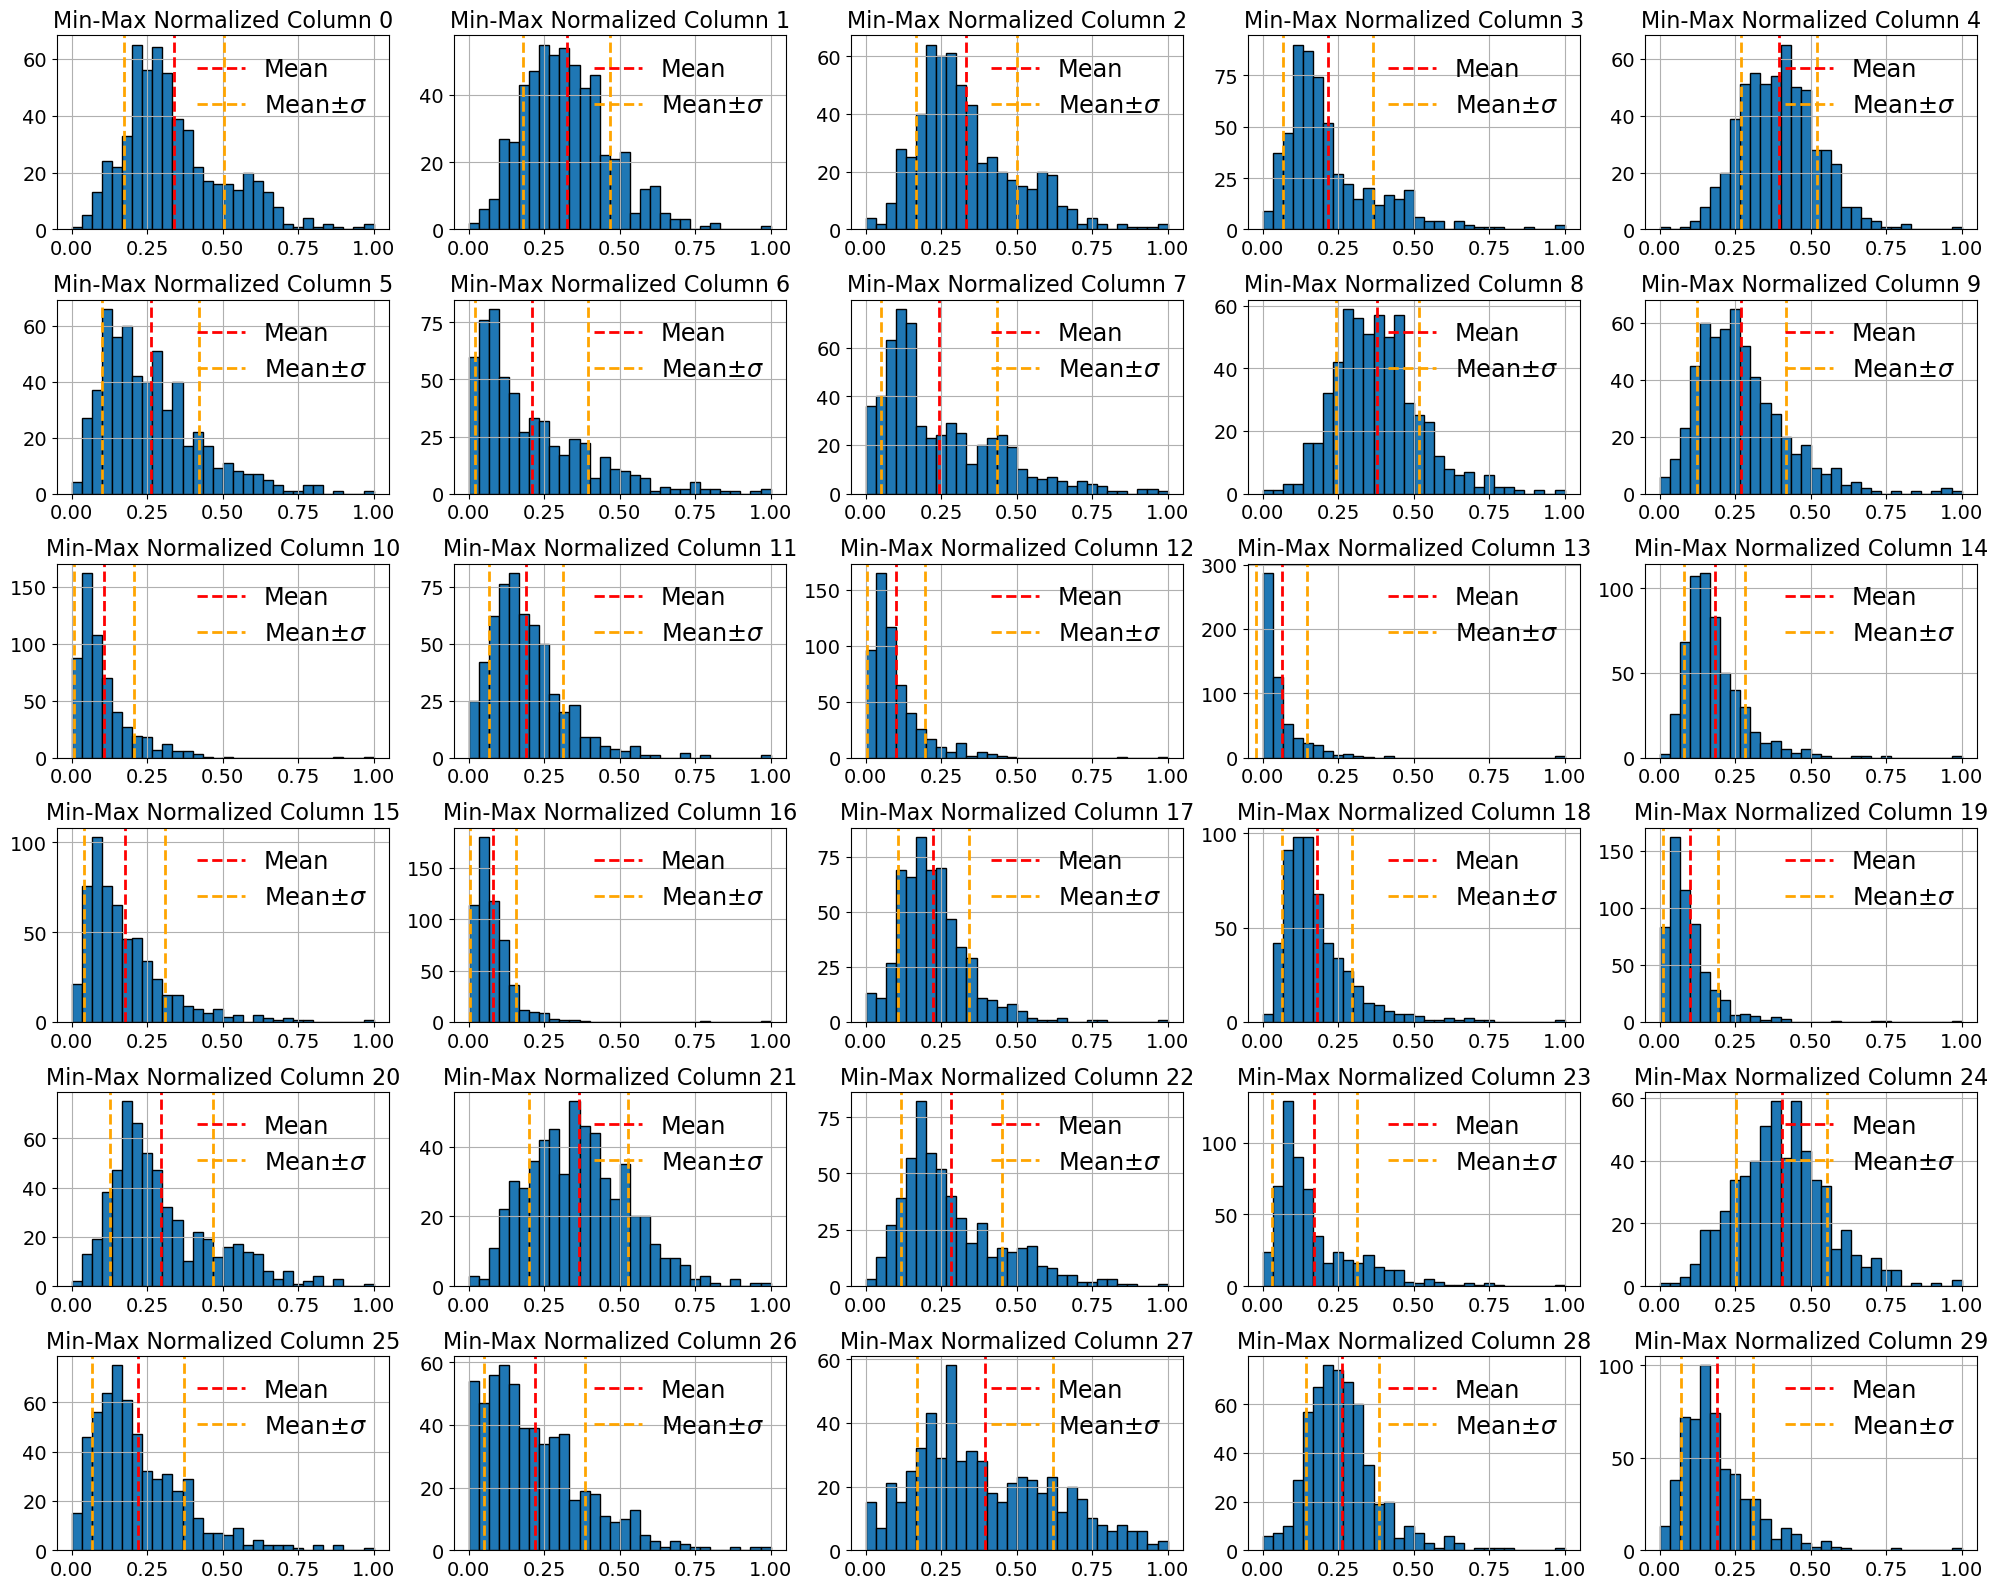

In [23]:
# Visualize the distribution of Standard normalized values for each column
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 16))

for i, column in enumerate(transformed_df_minmax.columns):
    row = i // 5  # trick from Edgar:  // == division entera
    col = i % 5
    axes[row, col].hist(transformed_df_minmax[column], bins=30, edgecolor='black')
    axes[row, col].set_title(f'Min-Max Normalized Column {column}')
    axes[row, col].grid()
    
    mean_val = np.mean(transformed_df_minmax[column])  
    std_val = np.std(transformed_df_minmax[column])    
    axes[row, col].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row, col].axvline(mean_val + std_val, color='orange', linestyle='dashed', linewidth=2, label='Mean$\pm \sigma$')
    axes[row, col].axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2)
    axes[row, col].legend()
plt.tight_layout()
plt.show()

From the below correlation and coefficient of determination, we can observe that we have strong correlations within the data, and we have linear relationship within several variables. Also we can see that repetition of patterns. This suggest that we have variables that provide similar information and we may be able to ignore some of them. However, the dimension reduction of the data will be acomplish with PCA in the following. Since the coefficient of determination is independent of normalization, we will not plot it again with the other normalization methods.

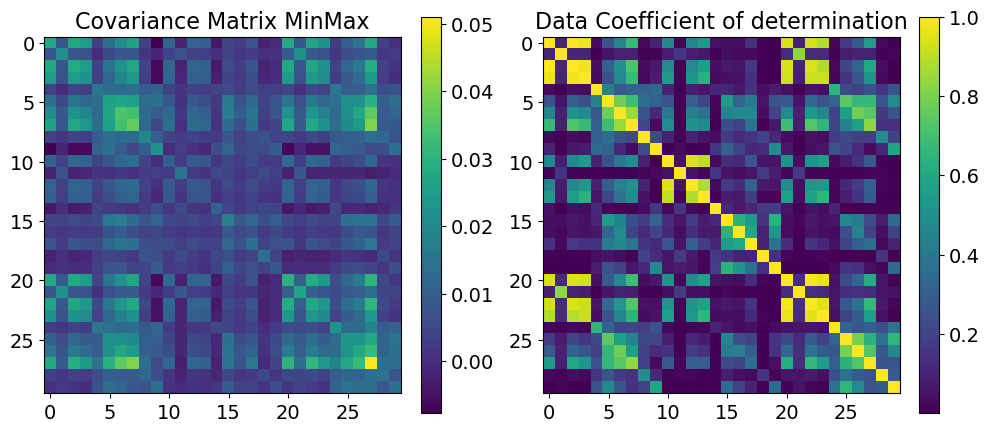

In [24]:
# Covariance and Correlation
covariance_minmax = transformed_df_minmax.cov()
correlation_minmax = transformed_df_minmax.corr()

#Covariance plot
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(covariance_minmax)
ax1.set_title('Covariance Matrix MinMax')

#Coefficient of determination plot
ax2.imshow(correlation_minmax**2)
ax2.set_title('Data Coefficient of determination')
#fig.suptitle("matrices")

#Colorbars
fig.colorbar(ax2.imshow(correlation_minmax**2), fraction=0.05) 
fig.colorbar(ax1.imshow(covariance_minmax), fraction=0.05)

plt.tight_layout()
plt.show()

### 2.1.2 log scale

Due to the right skewness of some of the data, we are applying Logaritmic transformation to the data and repeating the above steps. From the below code we can observe that the data now is similar in order of magnitude, the minimum value now is $0$ for each feature and in general we get the lowest values of the $3$ scales with the maximun value of $0.693147$.

In [25]:
# Apply logarithmic transformation using the minmax transformed data
transformed_df_log = np.log1p(transformed_df_minmax)  # Using np.log1p := log(1+x) 

#Transforming the data to dataframe
transformed_df_log = pd.DataFrame(transformed_df_log)

# Describing data
#print("Log normalized data: \n",transformed_df_log.head())
transformed_df_log.describe()


0           1           2           3           4           5   \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.284002    0.274775    0.279915    0.189544    0.328658    0.223935   
std      0.119803    0.107719    0.120729    0.113816    0.090248    0.121756   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.201587    0.197592    0.196263    0.111016    0.265893    0.130752   
50%      0.264194    0.269079    0.257232    0.159475    0.329562    0.202679   
75%      0.348148    0.342781    0.348376    0.239910    0.388990    0.293066   
max      0.693147    0.693147    0.693147    0.693147    0.693147    0.693147   

               6           7           8           9   ...          20  \
count  569.000000  569.000000  569.000000  569.000000  ...  569.000000   
mean     0.178275    0.206625    0.316919    0.232954  ...    0.251625   
std      0.143146    0.145576    0.098283    0.111117  ...    0.125823   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.066966    0.096168    0.248673    0.151017  ...    0.166123   
50%      0.134696    0.154009    0.314590    0.218245  ...    0.223499   
75%      0.267147    0.313199    0.373651    0.292934  ...    0.326667   
max      0.693147    0.693147    0.693147    0.693147  ...    0.693147   

               21          22          23          24          25          26  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.303359    0.241413    0.151427    0.333732    0.191893    0.188036   
std      0.118547    0.123679    0.109774    0.106646    0.117088    0.129717   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.216297    0.155153    0.078006    0.262369    0.110053    0.087510   
50%      0.305185    0.211330    0.116187    0.334385    0.164760    0.166421   
75%      0.386451    0.317344    0.199589    0.401561    0.264301    0.266839   
max      0.693147    0.693147    0.693147    0.693147    0.693147    0.693147   

               27          28          29  
count  569.000000  569.000000  569.000000  
mean     0.319263    0.229383    0.169060  
std      0.159398    0.092001    0.093740  
min      0.000000    0.000000    0.000000  
25%      0.201411    0.169825    0.102286  
50%      0.295205    0.221368    0.151843  
75%      0.441243    0.276233    0.217487  
max      0.693147    0.693147    0.693147  

[8 rows x 30 columns]

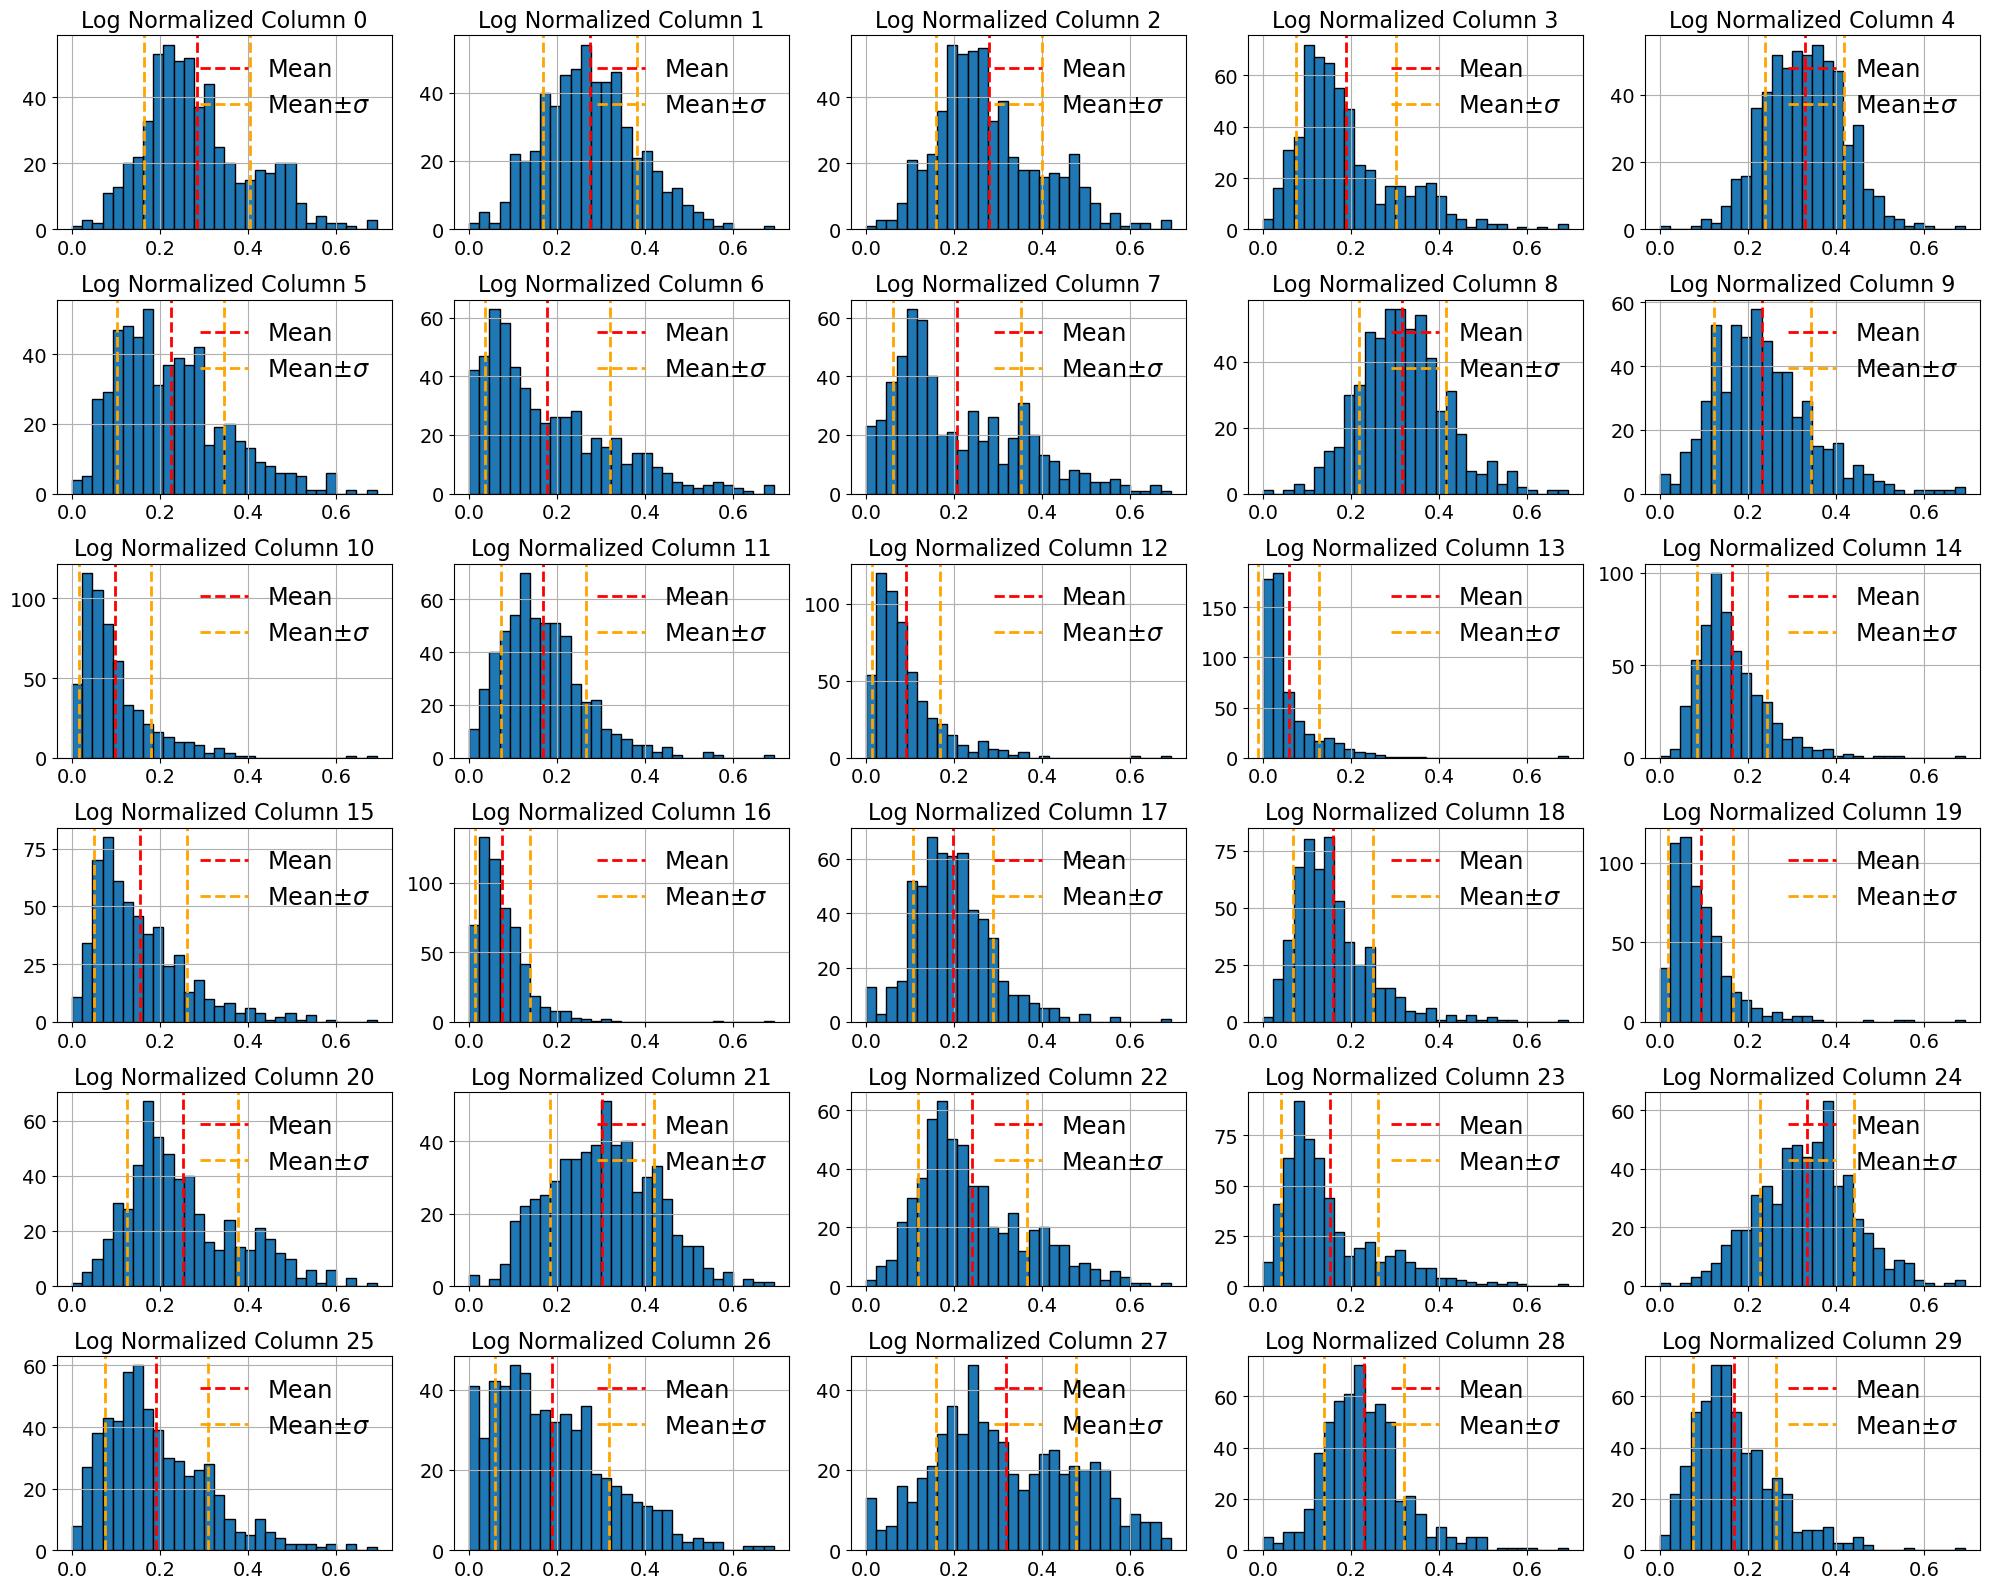

In [26]:
# Visualize the distribution of Log normalized values for each column
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 16))

for i, column in enumerate(transformed_df_log.columns):
    row = i // 5
    col = i % 5
    axes[row, col].hist(transformed_df_log[column], bins=30, edgecolor='black')
    axes[row, col].set_title(f'Log Normalized Column {column}')
    axes[row, col].grid()
    
    mean_val = np.mean(transformed_df_log[column])  
    std_val = np.std(transformed_df_log[column])    
    axes[row, col].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row, col].axvline(mean_val + std_val, color='orange', linestyle='dashed', linewidth=2, label='Mean$\pm \sigma$')
    axes[row, col].axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2)
    axes[row, col].legend()
plt.tight_layout()
plt.show()

### 2.1.3 Standard

Applying Standard transformation to the data and repeating the above steps.

In [27]:
from sklearn.preprocessing import StandardScaler

From the below code we can observe that the data now is similar in order of magnitude and has been standardized by the Standard normalization with the mean around $0$ and the standard deviation around $1$, as expected.

In [28]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the data
transformed_df_standard = scaler.fit_transform(df2)

#Transforming the data to dataframe
transformed_df_standard = pd.DataFrame(transformed_df_standard)

# describing Standard transformed data
#print("Standard scaler ormalized data: \n",transformed_df_standard.head())
transformed_df_standard.describe()

0             1             2             3             4   \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17 -1.248757e-16 -2.185325e-16 -8.366672e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00 -1.984504e+00 -1.454443e+00 -3.112085e+00   
25%   -6.893853e-01 -7.259631e-01 -6.919555e-01 -6.671955e-01 -7.109628e-01   
50%   -2.150816e-01 -1.046362e-01 -2.359800e-01 -2.951869e-01 -3.489108e-02   
75%    4.693926e-01  5.841756e-01  4.996769e-01  3.635073e-01  6.361990e-01   
max    3.971288e+00  4.651889e+00  3.976130e+00  5.250529e+00  4.770911e+00   

                 5             6             7             8             9   \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean   1.873136e-16  4.995028e-17 -4.995028e-17  1.748260e-16  4.745277e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -1.610136e+00 -1.114873e+00 -1.261820e+00 -2.744117e+00 -1.819865e+00   
25%   -7.470860e-01 -7.437479e-01 -7.379438e-01 -7.032397e-01 -7.226392e-01   
50%   -2.219405e-01 -3.422399e-01 -3.977212e-01 -7.162650e-02 -1.782793e-01   
75%    4.938569e-01  5.260619e-01  6.469351e-01  5.307792e-01  4.709834e-01   
max    4.568425e+00  4.243589e+00  3.927930e+00  4.484751e+00  4.910919e+00   

       ...            20            21            22          23  \
count  ...  5.690000e+02  5.690000e+02  5.690000e+02  569.000000   
mean   ... -8.241796e-16  1.248757e-17 -3.746271e-16    0.000000   
std    ...  1.000880e+00  1.000880e+00  1.000880e+00    1.000880   
min    ... -1.726901e+00 -2.223994e+00 -1.693361e+00   -1.222423   
25%    ... -6.749213e-01 -7.486293e-01 -6.895783e-01   -0.642136   
50%    ... -2.690395e-01 -4.351564e-02 -2.859802e-01   -0.341181   
75%    ...  5.220158e-01  6.583411e-01  5.402790e-01    0.357589   
max    ...  4.094189e+00  3.885905e+00  4.287337e+00    5.930172   

                 24            25            26            27            28  \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -2.372638e-16 -3.371644e-16  7.492542e-17  2.247763e-16  2.622390e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -2.682695e+00 -1.443878e+00 -1.305831e+00 -1.745063e+00 -2.160960e+00   
25%   -6.912304e-01 -6.810833e-01 -7.565142e-01 -7.563999e-01 -6.418637e-01   
50%   -4.684277e-02 -2.695009e-01 -2.182321e-01 -2.234689e-01 -1.274095e-01   
75%    5.975448e-01  5.396688e-01  5.311411e-01  7.125100e-01  4.501382e-01   
max    3.955374e+00  5.112877e+00  4.700669e+00  2.685877e+00  6.046041e+00   

                 29  
count  5.690000e+02  
mean  -5.744282e-16  
std    1.000880e+00  
min   -1.601839e+00  
25%   -6.919118e-01  
50%   -2.164441e-01  
75%    4.507624e-01  
max    6.846856e+00  

[8 rows x 30 columns]

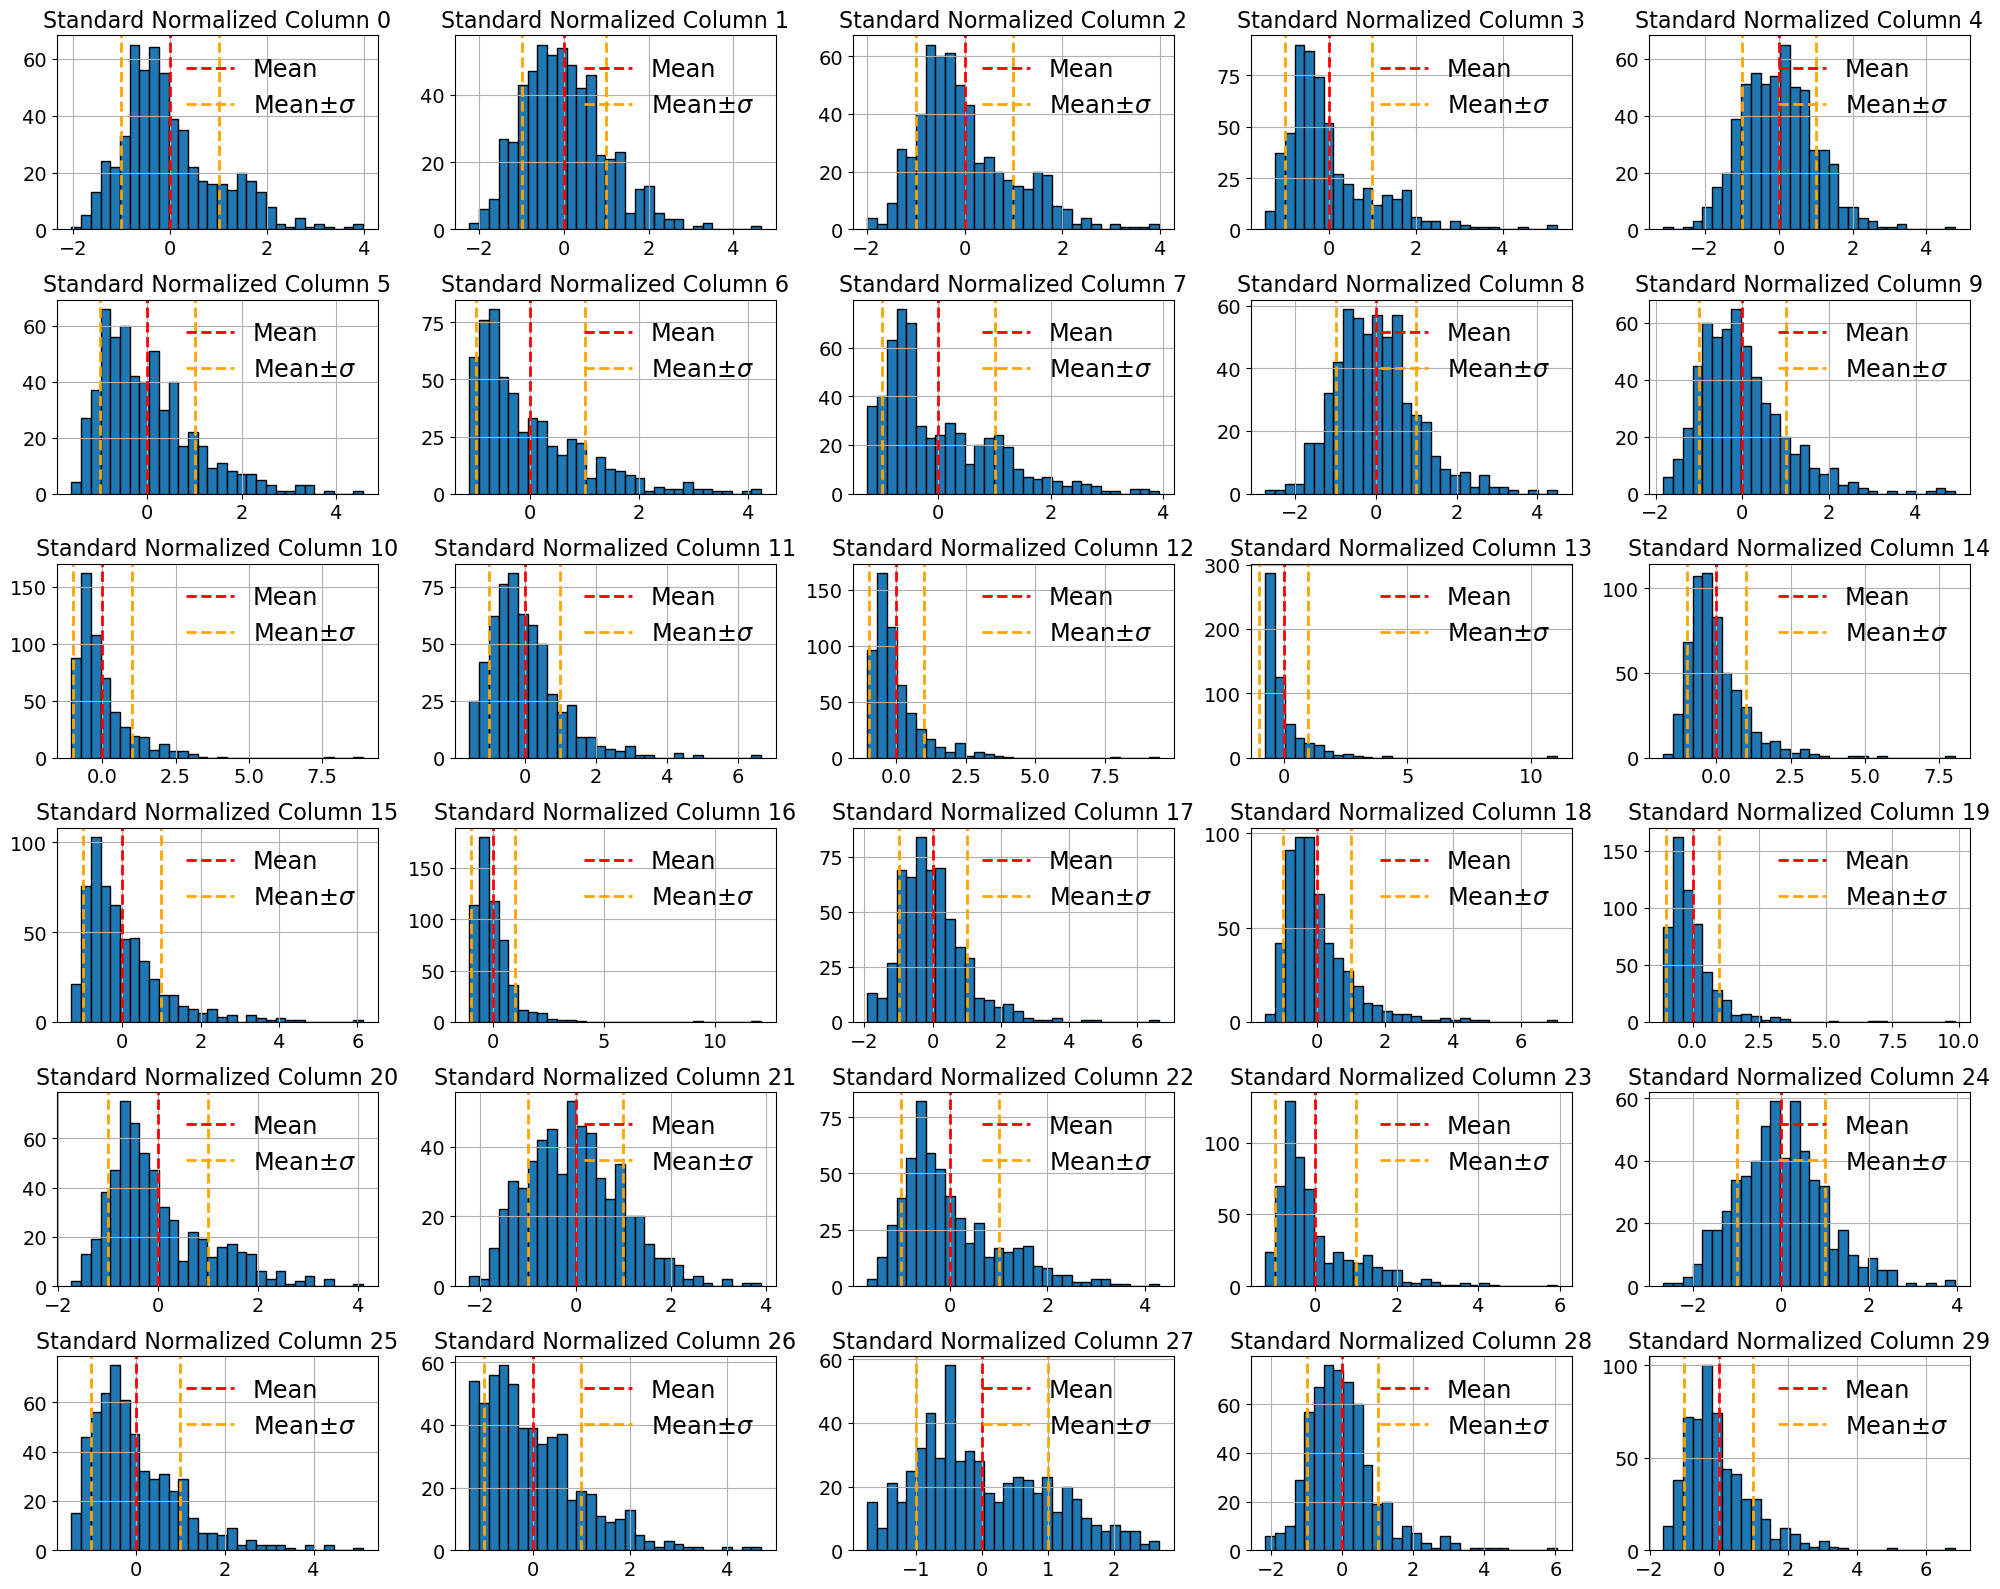

In [29]:
# Visualize the distribution of Standard normalized values for each column
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 16))

for i, column in enumerate(transformed_df_standard.columns):
    row = i // 5
    col = i % 5
    axes[row, col].hist(transformed_df_standard[column], bins=30, edgecolor='black')
    axes[row, col].set_title(f'Standard Normalized Column {column}')
    axes[row, col].grid()
    
    mean_val = np.mean(transformed_df_standard[column])  
    std_val = np.std(transformed_df_standard[column])    
    axes[row, col].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row, col].axvline(mean_val + std_val, color='orange', linestyle='dashed', linewidth=2, label='Mean$\pm \sigma$')
    axes[row, col].axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2)
    axes[row, col].legend()
    
plt.tight_layout()
plt.show()

## 2.2 Principal Components Analysis (PCA).

In [30]:
from sklearn.decomposition import PCA

After the brief exploration of the normalized data we proceed to reduce the dimension of the data.

In [31]:
#Renaming the 3 types of transformed data for further manipulation
data_normalized_standard = transformed_df_standard
data_normalized_log = transformed_df_log
data_normalized_minmax = transformed_df_minmax

First we visualize the impact of the normalization comparing the histogram´s shape of an arbitrary selection of variables. We observe no great change in the shape.

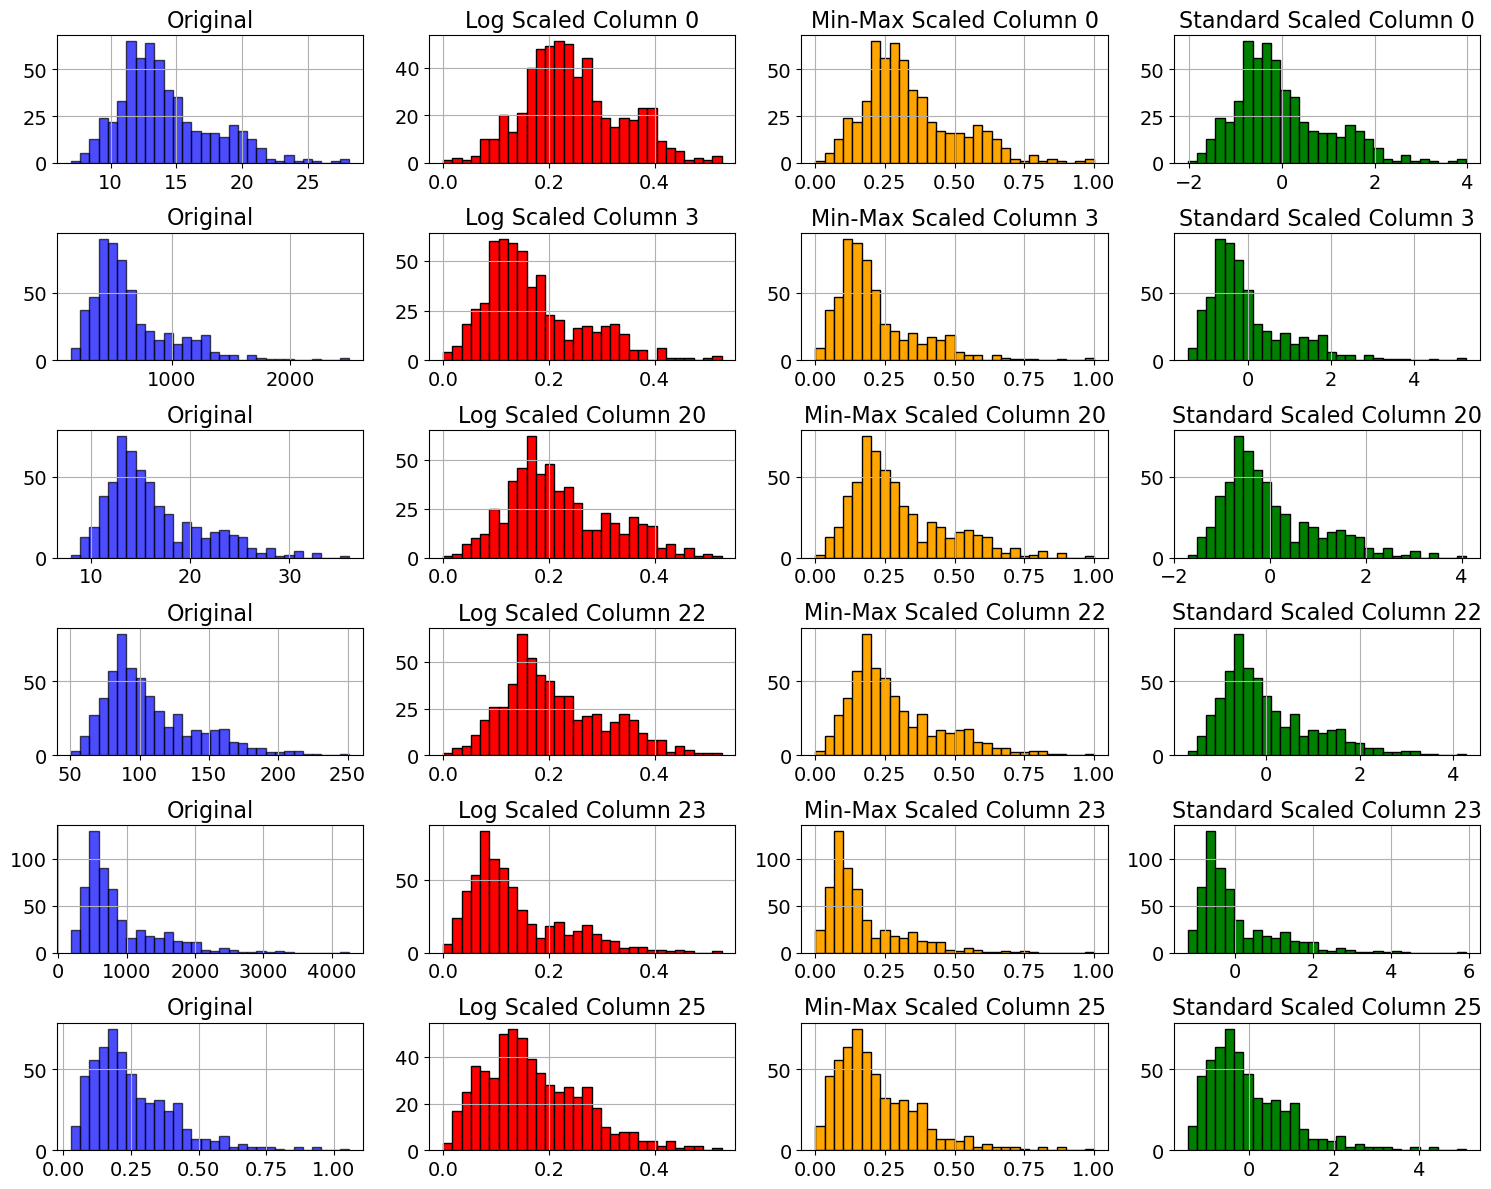

In [32]:
# Variables to compare
columns_to_compare = [0, 3, 20, 22, 23, 25]
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 12))

for i, column in enumerate(columns_to_compare):
    # Original data
    axes[i, 0].hist(df[column+2], bins=30, color='blue', alpha=0.7, label='Original',edgecolor='black')
    axes[i, 0].set_title(f'Original')
    axes[i, 0].grid()
    
    # Log scaled data
    axes[i, 1].hist(np.log1p(data_normalized_log[column]), bins=30, color='red', label='Log Scaled',edgecolor='black')
    axes[i, 1].set_title(f"Log Scaled Column {columns_to_compare[i]}")
    axes[i, 1].grid()
    
    # Min-Max data
    axes[i, 2].hist(data_normalized_minmax[column], bins=30, color='orange', label='Min-Max Scaled',edgecolor='black')
    axes[i, 2].set_title(f"Min-Max Scaled Column {columns_to_compare[i]}")
    axes[i, 2].grid()
    
    # Standardized data
    axes[i, 3].hist(data_normalized_standard[column], bins=30, color='green', label='Standardized',edgecolor='black')
    axes[i, 3].set_title(f"Standard Scaled Column {columns_to_compare[i]}")
    axes[i, 3].grid()

plt.tight_layout()
plt.show()

### 2.2.1 Dimension reduction using Principal Components Analysis (PCA).

We first calculate the explained variance according to the type of normalization to figure out wich normalization to use.

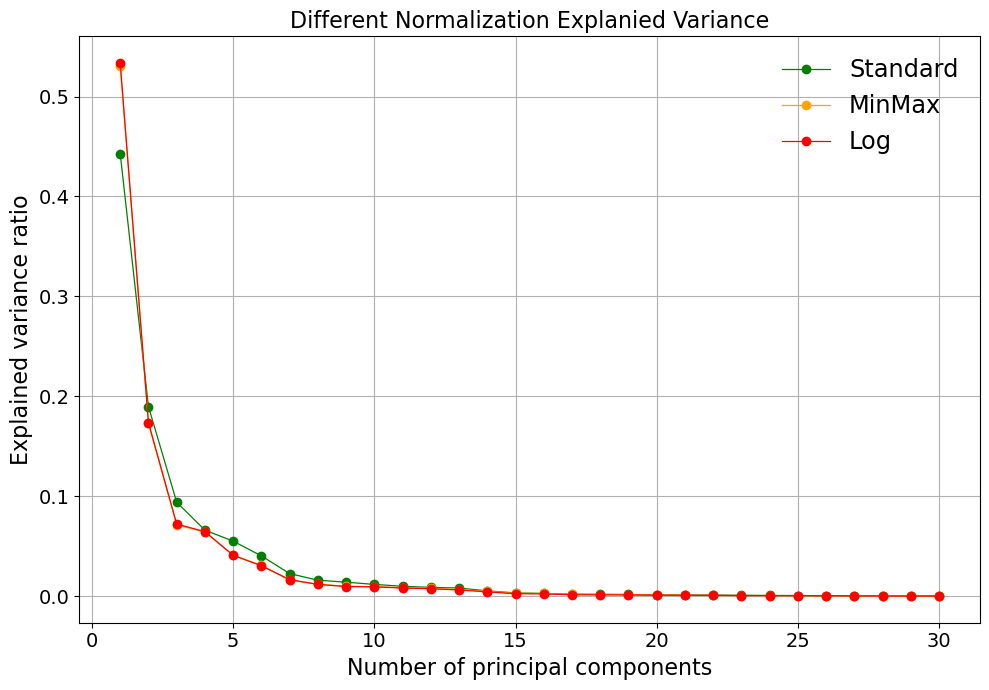

In [33]:
# Applying PCA for dimensionality reduction
pca = PCA()  # Reducing to 5 components 

#Evaluate the explained variande depending on the differents normalization
normalized_datas = [data_normalized_standard, data_normalized_minmax, data_normalized_log] #Differend datas
normalized_names = ["Standard", "MinMax", "Log"]   # Names of the data normalization
colors = ["green", "orange", "red"]   #Color

#Plotting 
for i, datas in enumerate(normalized_datas):  
    data_pca = pca.fit_transform(datas)
    plt.plot(range(1,len(pca.explained_variance_)+1), pca.explained_variance_ratio_, "-o", lw = 0.9, color = colors[i],label = normalized_names[i])
plt.grid()
plt.title("Different Normalization Explanied Variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Number of principal components")
plt.tight_layout()
plt.legend()

We can observe that after applying PCA the variance explained by the first few principal components is slightly higher when using Min-Max or Log scaling than when we use Standard scaling. We will assume that the reason for this is that Min-Max scaling is more effective for this specific dataset.

Then we perform PCA on the Log normalized data to figure out how many factors we will retain. 

In [34]:
# Applying PCA
pca = PCA()  #n_components=2)  # Reducing to n_componnts 
data_pca = pca.fit_transform(data_normalized_log)


We plot the percentage of variance explained.

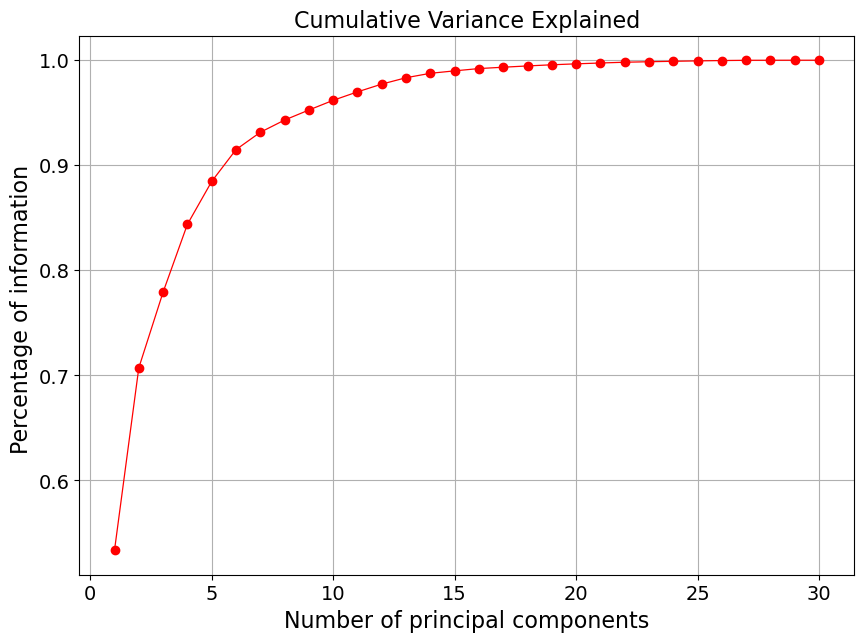

In [35]:
#Plotting the percentage of information against the new axes
explanied_variance_percentage = pca.explained_variance_ratio_ 
plt.plot(range(1,len(explanied_variance_percentage)+1),np.cumsum(explanied_variance_percentage),"r",marker = "o", lw = 0.9 )
plt.xlabel("Number of principal components")
plt.ylabel("Percentage of information ")
plt.title("Cumulative Variance Explained")
#plt.label()
plt.grid()

We plot the factorial plane.

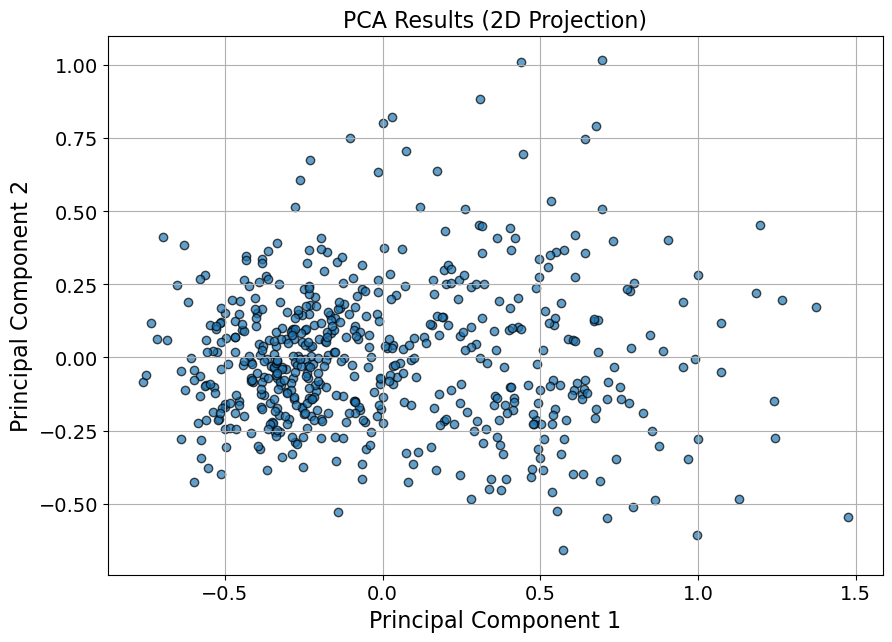

In [36]:
# Visualizing the PCA results in the factorial plane
plt.scatter(data_pca[:,0],data_pca[:,1], alpha=0.7, edgecolors="k")
plt.title('PCA Results (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

Since maintaining the first $6$ principal components will retain $91.49$% of the information, we will retain 6 components and work only with the reduced dimension data: *data_pca*.

In [37]:
pca = PCA(n_components=6)  # Reducing to n_componnts 
data_pca = pca.fit_transform(data_normalized_log)
a = pca.explained_variance_ratio_
print("Dimension of the reduced data:",data_pca.shape)
print("Percentage of information: {:.2f}%".format(100*sum(a)))

Dimension of the reduced data: (569, 6)
Percentage of information: 91.49%


### 2.2.2  Visualization on the data with the original labels

We investigate further the properties of the data with the original labels. From the plot below we can see the different $2D$ projections of the *data_pca*. We cal also compare the number of data of each type with the labels.

C:\Users\jojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pair Plot of PCA Components with Class Labels')

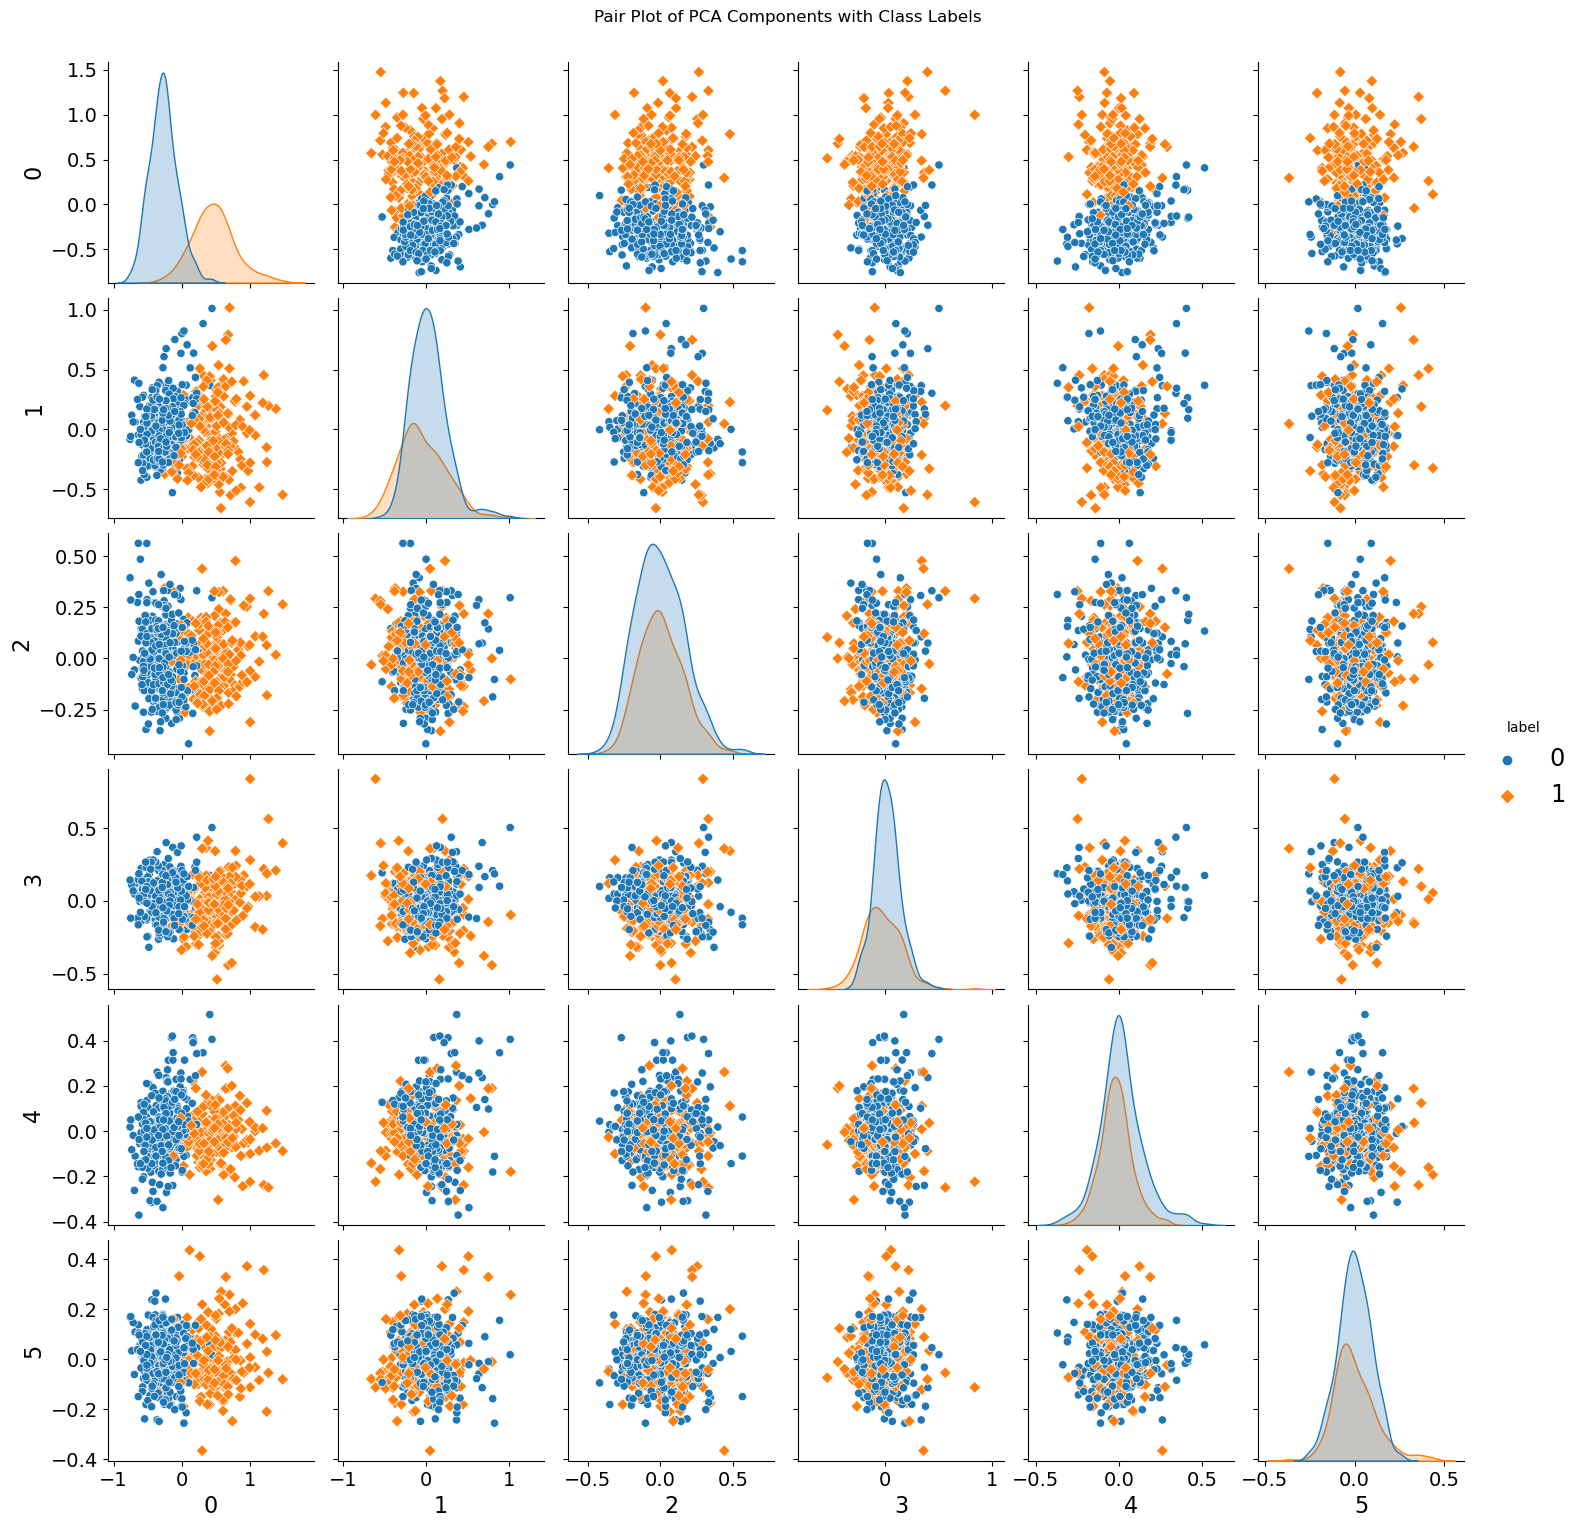

In [38]:
#Create a data frame with the transformed data to use sns.pairplot
df_pca = pd.DataFrame(data_pca)
df_pca['label'] = labels

# Create a pair plot
plot = sns.pairplot(df_pca, hue="label", markers=['o', "D"]) # Color the points based on the "label" column
plot.fig.suptitle("Pair Plot of PCA Components with Class Labels", y=1.02) # Title

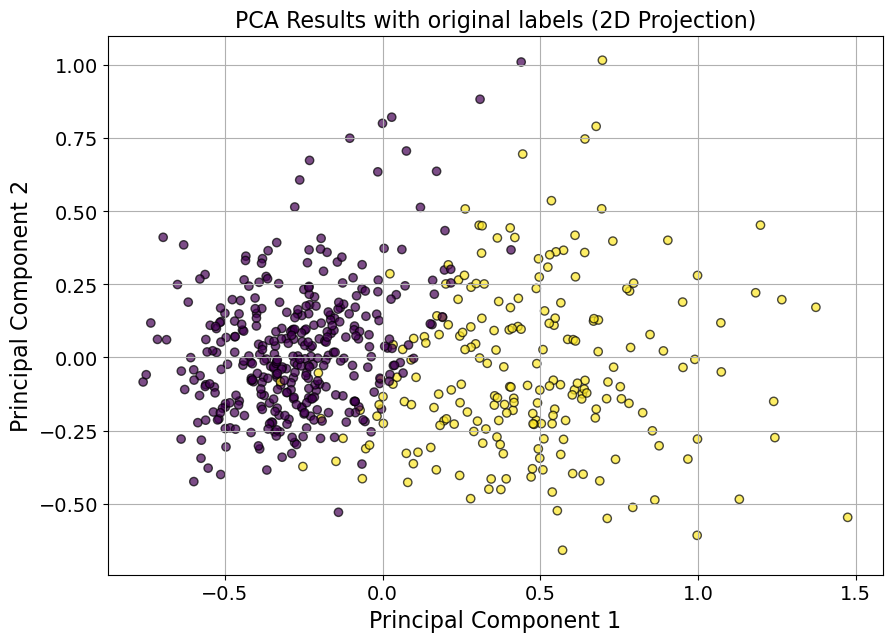

In [39]:
# Visualizing the PCA results in the factorial plane with labels
plt.scatter(data_pca[:,0],data_pca[:,1], c= labels, alpha=0.7, edgecolors="k")
plt.title('PCA Results with original labels (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 3 Clustering

Onece we accomplish the dimension reduction on the data, we are ready to do the clustering.

## 3.1 K-Means

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

We start using elbow method to identify the best number of clusters for our data. From the distortion is not so evident the elbow point but in the other plots we can see that $2$ clusters minimizes the Davies-Bouldin Index and maximizes the Silhouette and Calinski-Harabasz indexes. 

C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

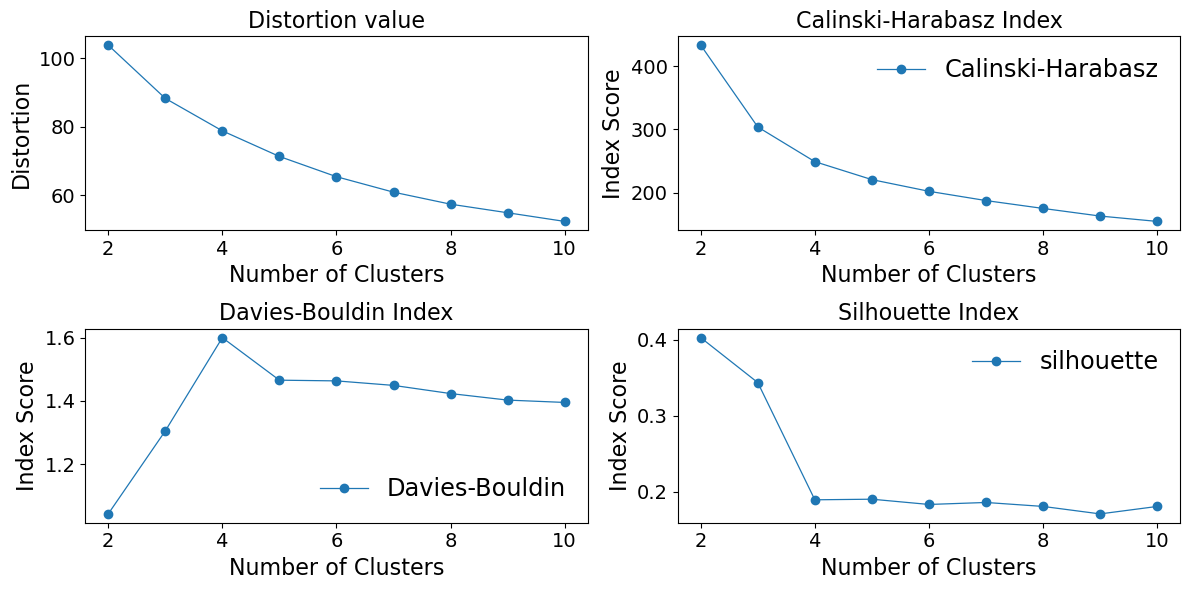

In [41]:
#Elbow method function
def elbow_method(data, max_clusters):
    
    #We prepare an empty array to save values for each iteration
    wcss = []
    calinski_scores = []
    davies_scores = []
    silhouette_scores = []
    
    #We apply k means n = max_clusters times
    for k in range(2, max_clusters + 1):
        
        #Apply kmeans for k clusters
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        #Indices of interest
        wcss.append(kmeans.inertia_)
        calinski_scores.append(calinski_harabasz_score(data, kmeans.labels_))
        davies_scores.append(davies_bouldin_score(data, kmeans.labels_))
        silhouette_scores.append(silhouette_score(data,kmeans.labels_ ))
        
    # Plot the elbow curve
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', lw = 0.9, label='WCSS')
    plt.title('Distortion value')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')

    plt.subplot(2, 2, 2)
    plt.plot(range(2, max_clusters + 1), calinski_scores, marker='o', lw = 0.9,label='Calinski-Harabasz')
    plt.title('Calinski-Harabasz Index')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Index Score')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(range(2, max_clusters + 1), davies_scores, marker='o', lw = 0.9,label='Davies-Bouldin')
    plt.title('Davies-Bouldin Index')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Index Score')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(np.linspace(2, max_clusters, max_clusters-1), silhouette_scores, lw = 0.9, marker='o', label='silhouette')
    plt.title('Silhouette Index')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Index Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the elbow method function
elbow_method(data_pca, max_clusters=10)


We implement K-Means with $n=2$ clusters and plot the resulting classification.

C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[ 0.51272686  0.00419604  0.00299761 -0.00803004 -0.00183353  0.00285411]
 [-0.27152471 -0.0022221  -0.00158744  0.00425247  0.00097098 -0.00151145]]


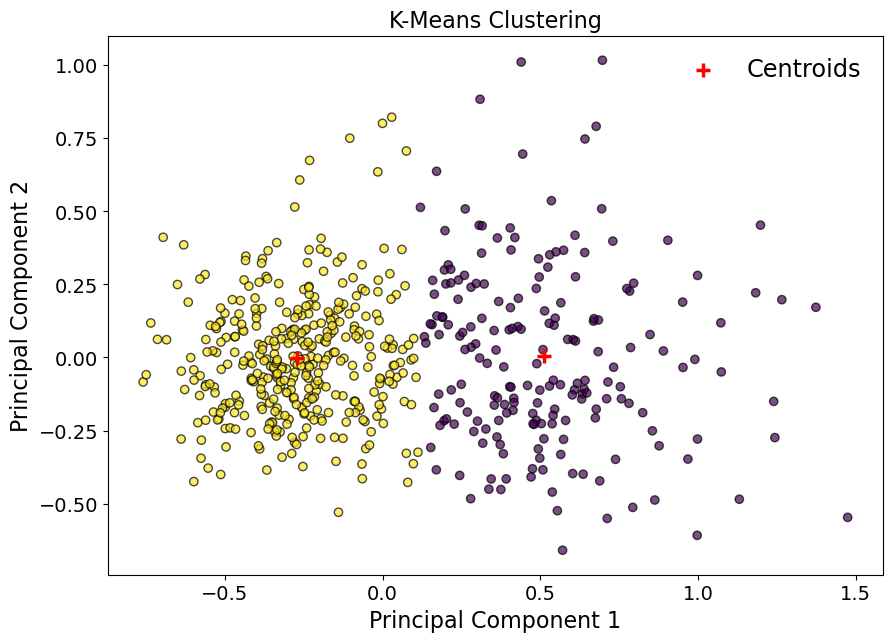

In [42]:
#Implementing kmeans for 2 clusters
kmeans = KMeans(n_clusters=2).fit(data_pca)
IrisClusters = kmeans.labels_
centroids = kmeans.cluster_centers_

#Ploting Clustering
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = IrisClusters, cmap='viridis', alpha = 0.7, edgecolor='black')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker='+', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
print(centroids)

Comparing results 

C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


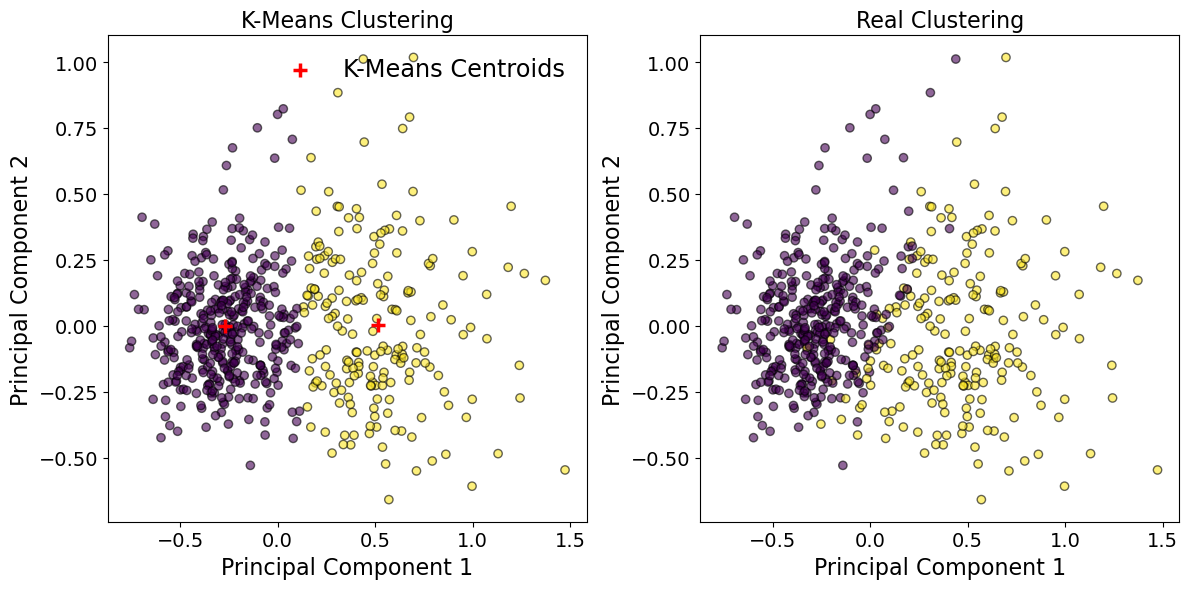

In [43]:
#Implementing kmeans for 2 clusters
kmeans = KMeans(n_clusters=2).fit(data_pca)
labels_kmeans = kmeans.labels_
centroids_kmeans = kmeans.cluster_centers_

#Ploting the comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# K-Means Clustering
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.6, edgecolor='black')
axes[0].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', marker='+', s=100, label='K-Means Centroids')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()

# Real Clustering
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolor='black')
axes[1].set_title('Real Clustering')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()

plt.tight_layout()


## 3.1.1 External validation K-Means

In [44]:
from sklearn.metrics import adjusted_rand_score

We proceed to calculate accuracy and Adjusted Rand Index (ARI). We have a $92.44$% accuracy and an ARI index of $0.72$. Both numbers indicate strong agreement between the model and the real labels, wich means that the clustering algorithm is performing good.

In [45]:
#Calculating accuracy
accuracy_kmeans = np.sum(labels_kmeans==labels)/len(labels_kmeans)
print(f"Accuracy of K-Means model is {accuracy_kmeans:.2%}")

#Calculating ARI
ari_kmeans = adjusted_rand_score(labels, labels_kmeans)
print(f"Adjusted Rand Index (ARI): {ari_kmeans:.2}")

Accuracy of K-Means model is 92.44%
Adjusted Rand Index (ARI): 0.72


## 3.2 Hierarchical Clustering Analysis HCA

We proceed to do the clustering with $4$ different types of linkage, then we compare them to know wich ones is better for our data.

In [46]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import confusion_matrix

In [47]:
#Performing the clustering with diferent types of linkage for comparisson
hca_complete = AgglomerativeClustering(n_clusters=None, distance_threshold = 0, compute_full_tree="auto", linkage='complete')#'ward', 'complete', 'average', 'single'
hca_average = AgglomerativeClustering(n_clusters=None, distance_threshold = 0, compute_full_tree="auto", linkage='average')
hca_ward = AgglomerativeClustering(n_clusters=None, distance_threshold = 0, compute_full_tree="auto", linkage='ward')
hca_single = AgglomerativeClustering(n_clusters=None, distance_threshold = 0, compute_full_tree="auto", linkage='single')

#Fitting the data with each linkage
data_hca_complete = hca_complete.fit(data_pca)
data_hca_average = hca_average.fit(data_pca)
data_hca_ward = hca_ward.fit(data_pca)
data_hca_single = hca_single.fit(data_pca)


For the Dendograms plotting we can see that the Ward and Complete linkage do a better job.

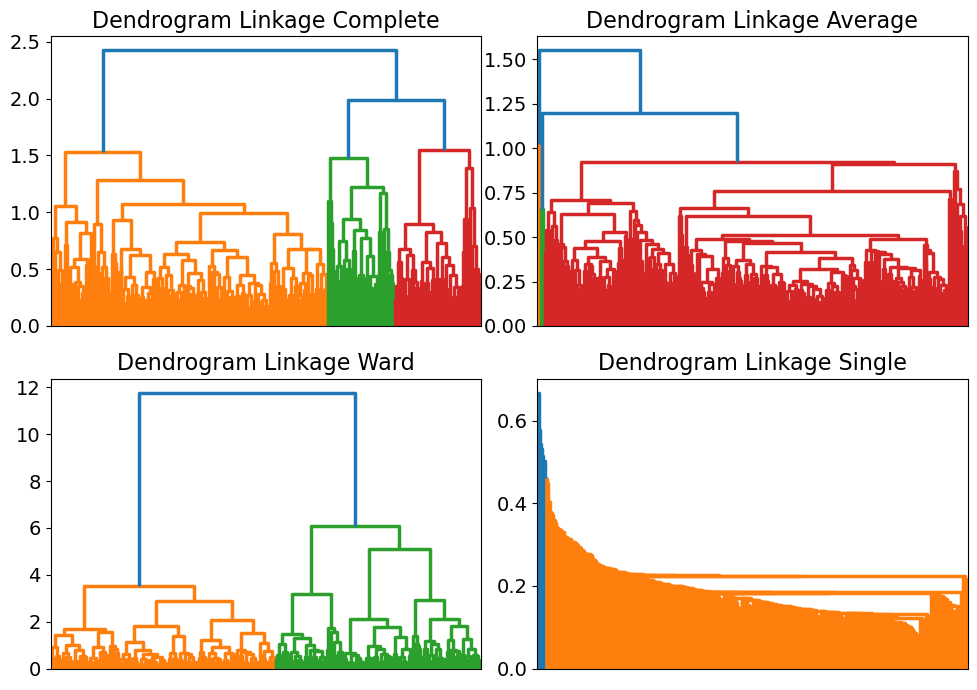

In [48]:
# Plotting three dendrograms(complete, ward and average) in the same figure
fig, axes = plt.subplots(2, 2)#, figsize=(8, 12))

# Plot dendrogram complete
sch.dendrogram(sch.linkage(data_pca, method='complete'), ax=axes[0,0])
axes[0,0].set_title('Dendrogram Linkage Complete')
axes[0,0].tick_params(axis='x', which='both', labelbottom=False)

# Plot dendrogram 2
sch.dendrogram(sch.linkage(data_pca, method='average'), ax=axes[0,1])
axes[0,1].set_title('Dendrogram Linkage Average')
axes[0,1].tick_params(axis='x', which='both', labelbottom=False)

# Plot dendrogram 3
sch.dendrogram(sch.linkage(data_pca, method='ward'), ax=axes[1,0])
axes[1,0].set_title('Dendrogram Linkage Ward')
axes[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot dendrogram 4
sch.dendrogram(sch.linkage(data_pca, method='single'), ax=axes[1,1])
axes[1,1].set_title('Dendrogram Linkage Single')
axes[1,1].tick_params(axis='x', which='both', labelbottom=False)

plt.tight_layout()

We perform a hierarchical clustering with different linkage methods again. Then we calculate Silhouette index to quantify the results with the number of clusters set to 2. Since the Silhouette index $S$ for wark and complete linkage is in the range $0.25<S<0.50$ we conclude that weak structures have been found. In the case of Average and Single linkage $0.5<S<0.75$ meaning that reasonable structures have been found. However Ward and Complete linkages have the highest Calinski-Harabasz index and Single inkage has the lowest Davies-Bouldin index. Since in the only case when the values of the indexes differ considerably are in the Calinski-Harabasz index, and taking into account the dendograms, we conclude that the better linkage are Complete and Ward.

In [49]:
#Labels predicted for 2 categories (-1 to have labels 0 and 1 instead of 1 and 2)
cut_labels_complete = sch.fcluster(sch.linkage(data_pca, method='complete'), t=2, criterion='maxclust')-1
cut_labels_average = sch.fcluster(sch.linkage(data_pca, method='average'), t=2, criterion='maxclust')-1
cut_labels_ward = sch.fcluster(sch.linkage(data_pca, method='ward'), t=2, criterion='maxclust')-1
cut_labels_single = sch.fcluster(sch.linkage(data_pca, method='single'), t=2, criterion='maxclust')-1

#Calculating the different indexes for the different methods
# Silhouette index
print(f"Silhouette Index (Ward Linkage): {silhouette_score(data_pca, cut_labels_ward)}")
print(f"Silhouette Index (Complete Linkage): {silhouette_score(data_pca, cut_labels_complete)}")
print(f"Silhouette Index (Average Linkage): {silhouette_score(data_pca, cut_labels_average)}")
print(f"Silhouette Index (Single Linkage): {silhouette_score(data_pca, cut_labels_single)}")
print("\n")

# Calculating Davies Index
print(f"Davies-Bouldin Index (Ward Linkage): {davies_bouldin_score(data_pca, cut_labels_ward)}")
print(f"Davies-Bouldin Index (Complete Linkage): {davies_bouldin_score(data_pca, cut_labels_complete)}")
print(f"Davies-Bouldin Index (Average Linkage): {davies_bouldin_score(data_pca, cut_labels_average)}")
print(f"Davies-Bouldin Index (Single Linkage): {davies_bouldin_score(data_pca, cut_labels_single)}")
print("\n")

# Calculating Calinski Index
print(f"Calinski-Harabasz Index (Ward Linkage): {calinski_harabasz_score(data_pca, cut_labels_ward)}")
print(f"Calinski-Harabasz Index (Complete Linkage): {calinski_harabasz_score(data_pca, cut_labels_complete)}")
print(f"Calinski-Harabasz Index (Average Linkage): {calinski_harabasz_score(data_pca, cut_labels_average)}")
print(f"Calinski-Harabasz Index (Single Linkage): {calinski_harabasz_score(data_pca, cut_labels_single)}")

Silhouette Index (Ward Linkage): 0.3219285490239056
Silhouette Index (Complete Linkage): 0.3969900254664564
Silhouette Index (Average Linkage): 0.5028122478936763
Silhouette Index (Single Linkage): 0.5108306359706168


Davies-Bouldin Index (Ward Linkage): 1.1745337593468141
Davies-Bouldin Index (Complete Linkage): 1.0601859315639994
Davies-Bouldin Index (Average Linkage): 0.7610786438670745
Davies-Bouldin Index (Single Linkage): 0.3476821008983844


Calinski-Harabasz Index (Ward Linkage): 346.1501639712164
Calinski-Harabasz Index (Complete Linkage): 424.1762584466084
Calinski-Harabasz Index (Average Linkage): 30.896298560280304
Calinski-Harabasz Index (Single Linkage): 6.953057384260302


### 3.2.1 External Validation HCA

To make the external validation, first we compare the results in a the Contingency table using the labels provided in the data. In this case we see in the tables that the Ward and Complete linkages are the only ones that make good predictions, as stated above.

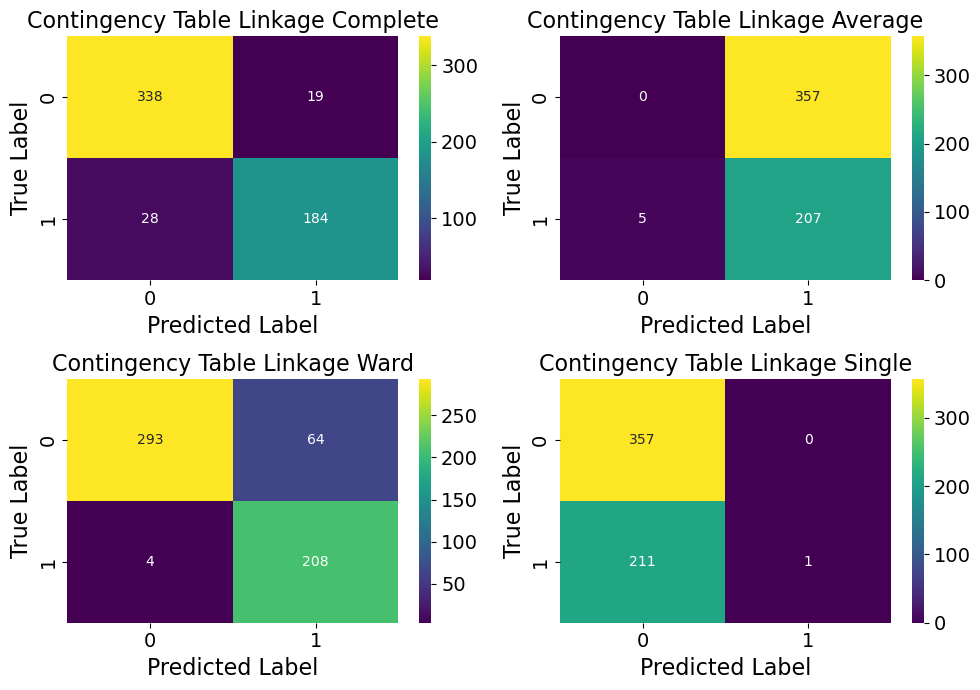

In [50]:

#Contingency table 
fig, axes = plt.subplots(2, 2)#, figsize=(12, 10))
#Linkage complete
sns.heatmap(pd.DataFrame(confusion_matrix(labels, cut_labels_complete)), annot=True, cmap='viridis',  fmt='d', cbar=True, ax=axes[0, 0])
axes[0, 0].set_title('Contingency Table Linkage Complete')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

#Linkage average
sns.heatmap(pd.DataFrame(confusion_matrix(labels, cut_labels_average)), annot=True, cmap='viridis', fmt='d', cbar=True, ax=axes[0, 1])
axes[0, 1].set_title('Contingency Table Linkage Average')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

#Linkage ward
sns.heatmap(pd.DataFrame(confusion_matrix(labels, cut_labels_ward)), annot=True, cmap='viridis', fmt='d', cbar=True, ax=axes[1, 0])
axes[1, 0].set_title('Contingency Table Linkage Ward')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

#Linkage single
sns.heatmap(pd.DataFrame(confusion_matrix(labels, cut_labels_single)), annot=True, cmap='viridis', fmt='d', cbar=True, ax=axes[1, 1])
axes[1, 1].set_title('Contingency Table Linkage Single')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')


plt.tight_layout()

We proceed to calculate accuracy and Adjusted Rand Index (ARI) for HCA. We can see again that the Model functions well with Ward and Complete linkage only.



In [51]:
#Calculating accuracy

accuracy_hca_average = np.sum(cut_labels_average==labels)/len(labels_kmeans)
accuracy_hca_complete = np.sum(cut_labels_complete==labels)/len(labels_kmeans)
accuracy_hca_single = np.sum(cut_labels_single==labels)/len(labels_kmeans)
accuracy_hca_ward = np.sum(cut_labels_ward==labels)/len(labels_kmeans)
print(f"Accuracy of HCA model with average linkage: {accuracy_hca_average:.2%}")
print(f"Accuracy of HCA model with complete linkage: {accuracy_hca_complete:.2%}")
print(f"Accuracy of HCA model with single linkage: {accuracy_hca_single:.2%}")
print(f"Accuracy of HCA model with ward linkage: {accuracy_hca_ward:.2%}")
print("\n")

#Calculating ARI
ari_hca_average = adjusted_rand_score(labels, cut_labels_average)
ari_hca_complete = adjusted_rand_score(labels, cut_labels_complete)
ari_hca_sinlge = adjusted_rand_score(labels, cut_labels_single)
ari_hca_ward = adjusted_rand_score(labels, cut_labels_ward)
print(f"Adjusted Rand Index of HCA model with average linkage (ARI): {ari_hca_average:.2}")
print(f"Adjusted Rand Index of HCA model with complete linkage (ARI): {ari_hca_complete:.2}")
print(f"Adjusted Rand Index of HCA model with single linkage (ARI): {ari_hca_sinlge:.2}")
print(f"Adjusted Rand Index of HCA model with ward linkage (ARI): {ari_hca_ward:.2}")

Accuracy of HCA model with average linkage: 36.38%
Accuracy of HCA model with complete linkage: 91.74%
Accuracy of HCA model with single linkage: 62.92%
Accuracy of HCA model with ward linkage: 88.05%


Adjusted Rand Index of HCA model with average linkage (ARI): 0.012
Adjusted Rand Index of HCA model with complete linkage (ARI): 0.69
Adjusted Rand Index of HCA model with single linkage (ARI): 0.0024
Adjusted Rand Index of HCA model with ward linkage (ARI): 0.58


# 4. Result

For this especific data it was possible to find defined structures. The best Cluster Algorithm of the ones used in this proyect was K-Means, and closely HCA with complete linkage. The optimal number of clusters for the K-means algorithm is $2$, and the acurracy of the best model is $92.44$%. The best normalization to apply to the data is the Logaritmic or MinMax.

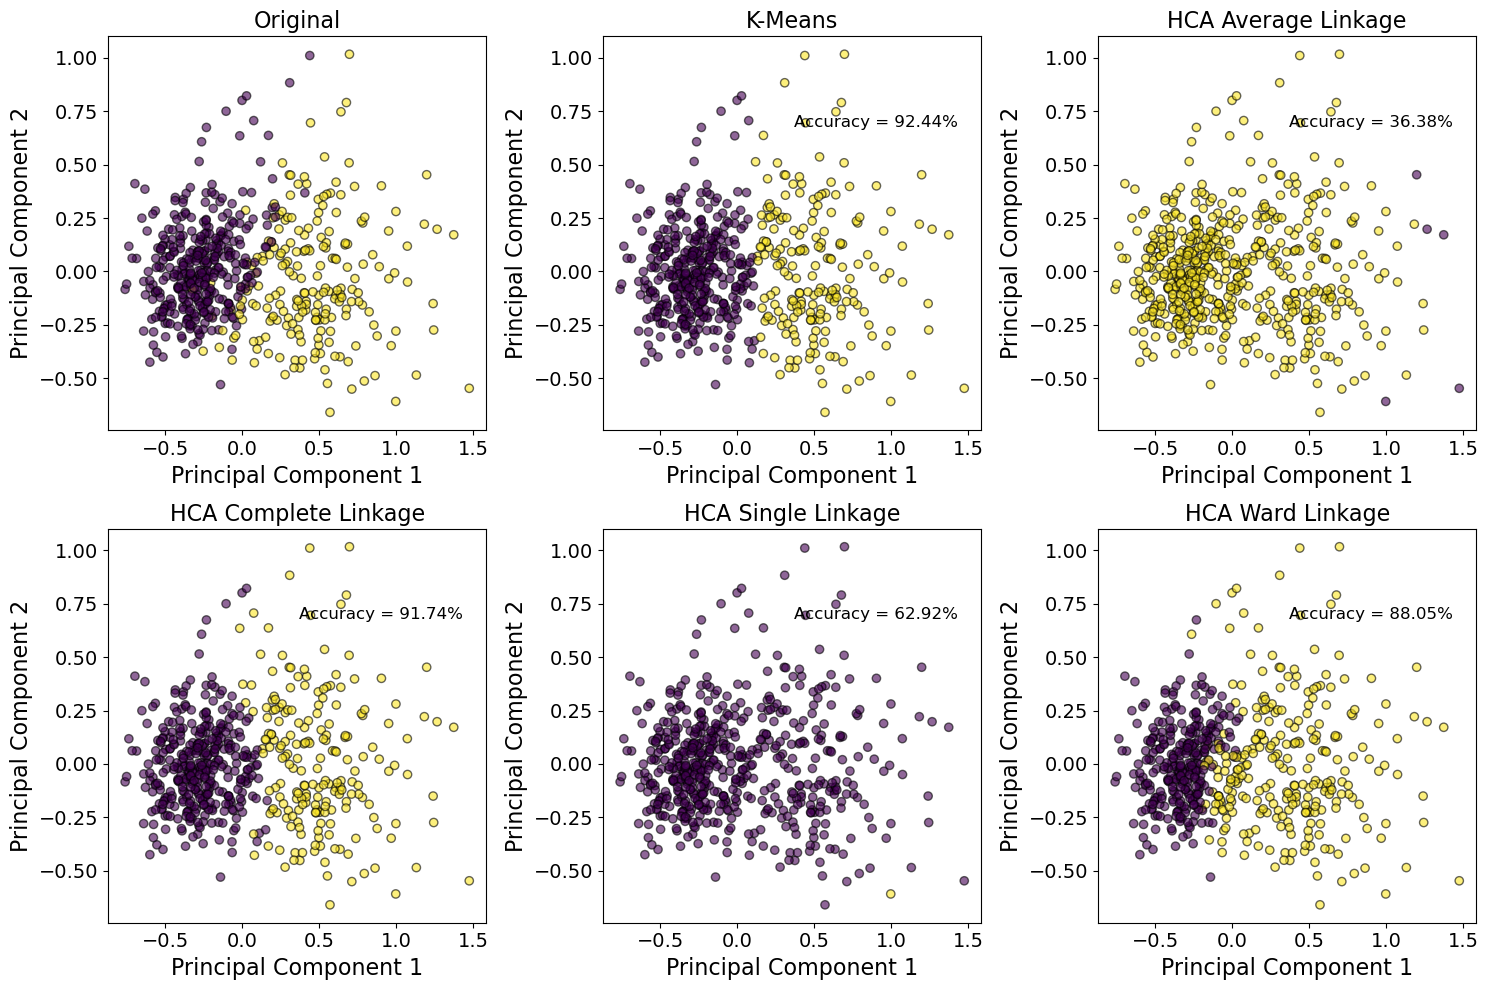

In [52]:
# Plots of the first factorial plane
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

#Names
titulos = ["Original","K-Means","HCA Average Linkage","HCA Complete Linkage","HCA Single Linkage","HCA Ward Linkage"]
#Accuracies
accuracies = ["", f"{accuracy_kmeans:.2%}", f"{accuracy_hca_average:.2%}", 
              f"{accuracy_hca_complete:.2%}",f"{accuracy_hca_single:.2%}",f"{accuracy_hca_ward:.2%}"]
#Labels 
labels_to = [labels, labels_kmeans, cut_labels_average, cut_labels_complete, cut_labels_single, cut_labels_ward]

# Plot each method
for i, ax in enumerate(axes):
    ax.scatter(data_pca[:,0], data_pca[:,1], c =labels_to[i] ,alpha=0.6,edgecolor='black' )
    ax.set_title(titulos[i])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    if i>0:
        ax.text(0.9,0.7, f"Accuracy = {accuracies[i]}", fontsize=12, color='k', ha='center', va='center')

plt.tight_layout()
plt.show()